In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Processing, Normalizing of Data and Polynomial Feature transformation functions

In [2]:
# read, process, normalize data
import numpy as np

df = pd.read_csv('insurance.txt', sep=",",header=None)
df.columns = ['age','bmi','children','charges']
df=df.drop(columns=['children'])
df.insert(0,'Nothing',1)
df = df.sample(frac = 1) 
print(df.head())

def norms(dataset):
    dataNorm=((dataset-dataset.mean())/(dataset.std()))
    return dataNorm

def normal(dataset):
    for i in range(dataset.shape[1]):
        if dataset.columns[i] == 'y': continue
        temp = dataset.iloc[:,i]
        dataset.iloc[:,i] = (temp - np.mean(temp))/np.std(temp)
    return dataset

def transform_dataset(datax, degree):
    data = datax.copy()
    degree = int(degree)
    if degree==1:
        if len(data.columns) == 3:
            data.columns = ['x1', 'x2', 'y']
        elif len(data.columns) == 4:
            data.columns = ['Const', 'x1', 'x2', 'y']
        #print(data.head())
        return data
    if len(data.columns) == 3:
        data.columns = ['x1', 'x2', 'y']
    elif len(data.columns) == 4:
        data.columns = ['Const', 'x1', 'x2', 'y']
    
    for d in range(2,degree+1):
        for x in range(d+1):
            data[ 'x1^'+str(x)+'x2^'+str(d-x) ] = (data.loc[:, 'x1']**x)*(data.loc[:, 'x2']**(d-x))
    
    return data


      Nothing  age     bmi      charges
693         1   24  23.655   2352.96845
1271        1   25  34.485   3021.80915
668         1   62  32.015  45710.20785
854         1   49  23.845  24106.91255
487         1   19  28.700   1253.93600


Gradient descent without regularization

In [3]:
def testaccuracy(w,y,x_test):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x_test @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    return cost

   Nothing  age     bmi      charges
0        1   19  27.900  16884.92400
1        1   18  33.770   1725.55230
2        1   28  33.000   4449.46200
3        1   33  22.705  21984.47061
4        1   32  28.880   3866.85520
      Const        x1        x2         y
0       NaN -1.438227 -0.453151  0.298472
1       NaN -1.509401  0.509431 -0.953333
2       NaN -0.797655  0.383164 -0.728402
3       NaN -0.441782 -1.305043  0.719574
4       NaN -0.512957 -0.292447 -0.776512
5       NaN -0.584132 -0.807354 -0.785615
6       NaN  0.483487  0.455316 -0.415345
7       NaN -0.157084 -0.479388 -0.494543
8       NaN -0.157084 -0.136663 -0.566805
9       NaN  1.479931 -0.790956  1.292543
10      NaN -1.011179 -0.728642 -0.871106
11      NaN  1.622280 -0.717163  1.200519
12      NaN -1.153528  0.612740 -0.944969
13      NaN  1.195233  1.501529 -0.179992
14      NaN -0.868830  1.880330  2.175170
15      NaN -1.438227 -0.994295 -0.944110
16      NaN  0.910535  0.019121 -0.204218
17      NaN -1.153528 

No of iterations: 1850
Training error: [0.67756195]
No of iterations: 1900
Training error: [0.6767647]
No of iterations: 1950
Training error: [0.67604972]
No of iterations: 2000
Training error: [0.67540858]
No of iterations: 2050
Training error: [0.67483367]
No of iterations: 2100
Training error: [0.67431818]
No of iterations: 2150
Training error: [0.673856]
No of iterations: 2200
Training error: [0.67344162]
No of iterations: 2250
Training error: [0.6730701]
No of iterations: 2300
Training error: [0.67273703]
No of iterations: 2350
Training error: [0.67243842]
No of iterations: 2400
Training error: [0.67217071]
No of iterations: 2450
Training error: [0.67193071]
No of iterations: 2500
Training error: [0.67171554]
No of iterations: 2550
Training error: [0.67152263]
No of iterations: 2600
Training error: [0.67134968]
No of iterations: 2650
Training error: [0.67119462]
No of iterations: 2700
Training error: [0.6710556]
No of iterations: 2750
Training error: [0.67093095]
No of iterations:

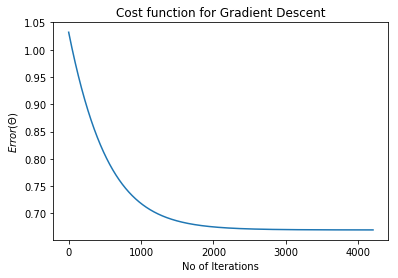

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880
12      NaN -1.153528  0.612740 -0.944969  0.530999 -0.804380 -1

No of iterations: 300
Training error: [0.9128099]
No of iterations: 350
Training error: [0.86948953]
No of iterations: 400
Training error: [0.8350397]
No of iterations: 450
Training error: [0.80762473]
No of iterations: 500
Training error: [0.78574633]
No of iterations: 550
Training error: [0.7682022]
No of iterations: 600
Training error: [0.75404131]
No of iterations: 650
Training error: [0.74252003]
No of iterations: 700
Training error: [0.73306192]
No of iterations: 750
Training error: [0.7252228]
No of iterations: 800
Training error: [0.71866156]
No of iterations: 850
Training error: [0.71311649]
No of iterations: 900
Training error: [0.70838668]
No of iterations: 950
Training error: [0.70431733]
No of iterations: 1000
Training error: [0.70078869]
No of iterations: 1050
Training error: [0.69770748]
No of iterations: 1100
Training error: [0.69500048]
No of iterations: 1150
Training error: [0.69260968]
No of iterations: 1200
Training error: [0.69048867]
No of iterations: 1250
Trainin

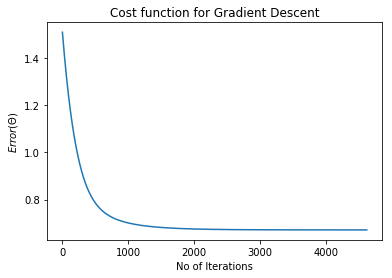

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 200
Training error: [1.07351718]
No of iterations: 250
Training error: [0.92731889]
No of iterations: 300
Training error: [0.83502014]
No of iterations: 350
Training error: [0.77832434]
No of iterations: 400
Training error: [0.74400466]
No of iterations: 450
Training error: [0.72322791]
No of iterations: 500
Training error: [0.71046763]
No of iterations: 550
Training error: [0.70241629]
No of iterations: 600
Training error: [0.69714409]
No of iterations: 650
Training error: [0.69353718]
No of iterations: 700
Training error: [0.69095262]
No of iterations: 750
Training error: [0.68901603]
No of iterations: 800
Training error: [0.68750592]
No of iterations: 850
Training error: [0.68628818]
No of iterations: 900
Training error: [0.6852793]
No of iterations: 950
Training error: [0.68442547]
No of iterations: 1000
Training error: [0.68369076]
No of iterations: 1050
Training error: [0.68305025]
No of iterations: 1100
Training error: [0.68248604]
No of iterations: 1150
Traini

No of iterations: 8150
Training error: [0.67240459]
No of iterations: 8200
Training error: [0.67237992]
No of iterations: 8250
Training error: [0.67235541]
No of iterations: 8300
Training error: [0.67233107]
No of iterations: 8350
Training error: [0.6723069]
No of iterations: 8400
Training error: [0.6722829]
No of iterations: 8450
Training error: [0.67225906]
No of iterations: 8500
Training error: [0.67223539]
No of iterations: 8550
Training error: [0.67221187]
No of iterations: 8600
Training error: [0.67218852]
No of iterations: 8650
Training error: [0.67216533]
No of iterations: 8700
Training error: [0.6721423]
No of iterations: 8750
Training error: [0.67211943]
No of iterations: 8800
Training error: [0.67209671]
No of iterations: 8850
Training error: [0.67207415]
No of iterations: 8900
Training error: [0.67205174]
No of iterations: 8950
Training error: [0.67202949]
No of iterations: 9000
Training error: [0.67200739]
No of iterations: 9050
Training error: [0.67198544]
No of iteration

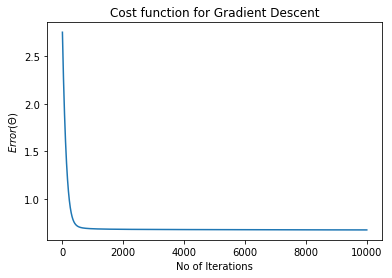

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 200
Training error: [0.9538399]
No of iterations: 250
Training error: [0.82823407]
No of iterations: 300
Training error: [0.76482179]
No of iterations: 350
Training error: [0.73166423]
No of iterations: 400
Training error: [0.71321674]
No of iterations: 450
Training error: [0.70225142]
No of iterations: 500
Training error: [0.69535904]
No of iterations: 550
Training error: [0.69084076]
No of iterations: 600
Training error: [0.68778537]
No of iterations: 650
Training error: [0.68566761]
No of iterations: 700
Training error: [0.68416661]
No of iterations: 750
Training error: [0.68307829]
No of iterations: 800
Training error: [0.68226944]
No of iterations: 850
Training error: [0.68165171]
No of iterations: 900
Training error: [0.68116592]
No of iterations: 950
Training error: [0.68077217]
No of iterations: 1000
Training error: [0.68044343]
No of iterations: 1050
Training error: [0.68016127]
No of iterations: 1100
Training error: [0.67991309]
No of iterations: 1150
Traini

No of iterations: 8200
Training error: [0.67072858]
No of iterations: 8250
Training error: [0.67070351]
No of iterations: 8300
Training error: [0.6706787]
No of iterations: 8350
Training error: [0.67065413]
No of iterations: 8400
Training error: [0.67062982]
No of iterations: 8450
Training error: [0.67060574]
No of iterations: 8500
Training error: [0.67058191]
No of iterations: 8550
Training error: [0.67055832]
No of iterations: 8600
Training error: [0.67053497]
No of iterations: 8650
Training error: [0.67051185]
No of iterations: 8700
Training error: [0.67048896]
No of iterations: 8750
Training error: [0.67046631]
No of iterations: 8800
Training error: [0.67044388]
No of iterations: 8850
Training error: [0.67042167]
No of iterations: 8900
Training error: [0.67039969]
No of iterations: 8950
Training error: [0.67037792]
No of iterations: 9000
Training error: [0.67035638]
No of iterations: 9050
Training error: [0.67033504]
No of iterations: 9100
Training error: [0.67031393]
No of iterati

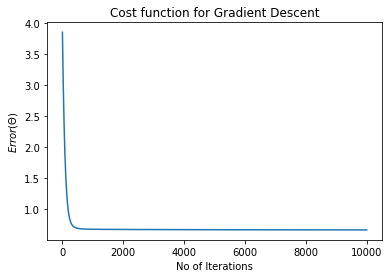

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 150
Training error: [0.93717472]
No of iterations: 200
Training error: [0.82177061]
No of iterations: 250
Training error: [0.78488011]
No of iterations: 300
Training error: [0.76934486]
No of iterations: 350
Training error: [0.75964589]
No of iterations: 400
Training error: [0.75188075]
No of iterations: 450
Training error: [0.74505501]
No of iterations: 500
Training error: [0.7388854]
No of iterations: 550
Training error: [0.73326513]
No of iterations: 600
Training error: [0.72813409]
No of iterations: 650
Training error: [0.72344686]
No of iterations: 700
Training error: [0.71916445]
No of iterations: 750
Training error: [0.7152519]
No of iterations: 800
Training error: [0.71167736]
No of iterations: 850
Training error: [0.7084117]
No of iterations: 900
Training error: [0.70542824]
No of iterations: 950
Training error: [0.70270248]
No of iterations: 1000
Training error: [0.70021197]
No of iterations: 1050
Training error: [0.69793613]
No of iterations: 1100
Training 

No of iterations: 8200
Training error: [0.66981355]
No of iterations: 8250
Training error: [0.66980537]
No of iterations: 8300
Training error: [0.66979733]
No of iterations: 8350
Training error: [0.66978943]
No of iterations: 8400
Training error: [0.66978166]
No of iterations: 8450
Training error: [0.66977401]
No of iterations: 8500
Training error: [0.6697665]
No of iterations: 8550
Training error: [0.66975911]
No of iterations: 8600
Training error: [0.66975184]
No of iterations: 8650
Training error: [0.66974469]
No of iterations: 8700
Training error: [0.66973765]
No of iterations: 8750
Training error: [0.66973073]
No of iterations: 8800
Training error: [0.66972392]
No of iterations: 8850
Training error: [0.66971722]
No of iterations: 8900
Training error: [0.66971063]
No of iterations: 8950
Training error: [0.66970413]
No of iterations: 9000
Training error: [0.66969775]
No of iterations: 9050
Training error: [0.66969146]
No of iterations: 9100
Training error: [0.66968527]
No of iterati

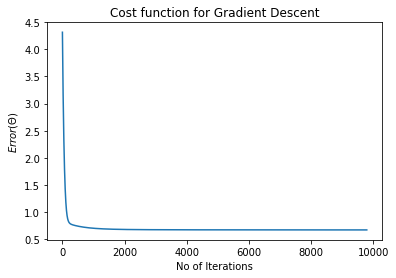

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 150
Training error: [0.93785166]
No of iterations: 200
Training error: [0.84762322]
No of iterations: 250
Training error: [0.8198187]
No of iterations: 300
Training error: [0.80403008]
No of iterations: 350
Training error: [0.79168843]
No of iterations: 400
Training error: [0.78104905]
No of iterations: 450
Training error: [0.77157375]
No of iterations: 500
Training error: [0.76301424]
No of iterations: 550
Training error: [0.75522588]
No of iterations: 600
Training error: [0.74811228]
No of iterations: 650
Training error: [0.74160242]
No of iterations: 700
Training error: [0.73563959]
No of iterations: 750
Training error: [0.73017585]
No of iterations: 800
Training error: [0.72516901]
No of iterations: 850
Training error: [0.72058114]
No of iterations: 900
Training error: [0.71637767]
No of iterations: 950
Training error: [0.71252691]
No of iterations: 1000
Training error: [0.70899966]
No of iterations: 1050
Training error: [0.70576906]
No of iterations: 1100
Trainin

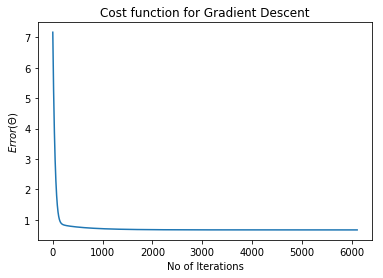

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 150
Training error: [0.89836508]
No of iterations: 200
Training error: [0.84705285]
No of iterations: 250
Training error: [0.82800632]
No of iterations: 300
Training error: [0.814708]
No of iterations: 350
Training error: [0.80363371]
No of iterations: 400
Training error: [0.79386485]
No of iterations: 450
Training error: [0.78502474]
No of iterations: 500
Training error: [0.77692787]
No of iterations: 550
Training error: [0.76946978]
No of iterations: 600
Training error: [0.76258231]
No of iterations: 650
Training error: [0.75621447]
No of iterations: 700
Training error: [0.75032408]
No of iterations: 750
Training error: [0.74487413]
No of iterations: 800
Training error: [0.73983108]
No of iterations: 850
Training error: [0.73516416]
No of iterations: 900
Training error: [0.7308449]
No of iterations: 950
Training error: [0.72684691]
No of iterations: 1000
Training error: [0.72314574]
No of iterations: 1050
Training error: [0.71971872]
No of iterations: 1100
Training 

No of iterations: 8100
Training error: [0.67114105]
No of iterations: 8150
Training error: [0.67112415]
No of iterations: 8200
Training error: [0.67110737]
No of iterations: 8250
Training error: [0.67109073]
No of iterations: 8300
Training error: [0.67107421]
No of iterations: 8350
Training error: [0.67105782]
No of iterations: 8400
Training error: [0.67104155]
No of iterations: 8450
Training error: [0.6710254]
No of iterations: 8500
Training error: [0.67100936]
No of iterations: 8550
Training error: [0.67099344]
No of iterations: 8600
Training error: [0.67097763]
No of iterations: 8650
Training error: [0.67096193]
No of iterations: 8700
Training error: [0.67094635]
No of iterations: 8750
Training error: [0.67093086]
No of iterations: 8800
Training error: [0.67091549]
No of iterations: 8850
Training error: [0.67090021]
No of iterations: 8900
Training error: [0.67088504]
No of iterations: 8950
Training error: [0.67086997]
No of iterations: 9000
Training error: [0.670855]
No of iteration

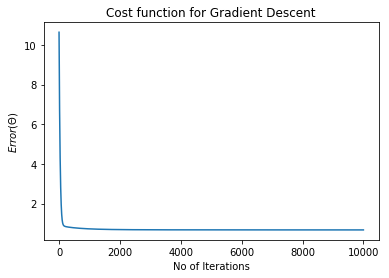

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 150
Training error: [1.14558699]
No of iterations: 200
Training error: [1.05768183]
No of iterations: 250
Training error: [1.00738165]
No of iterations: 300
Training error: [0.97156251]
No of iterations: 350
Training error: [0.94246639]
No of iterations: 400
Training error: [0.91715634]
No of iterations: 450
Training error: [0.89446387]
No of iterations: 500
Training error: [0.87387482]
No of iterations: 550
Training error: [0.85511835]
No of iterations: 600
Training error: [0.83801631]
No of iterations: 650
Training error: [0.82242841]
No of iterations: 700
Training error: [0.80823223]
No of iterations: 750
Training error: [0.79531596]
No of iterations: 800
Training error: [0.7835757]
No of iterations: 850
Training error: [0.77291446]
No of iterations: 900
Training error: [0.76324166]
No of iterations: 950
Training error: [0.75447286]
No of iterations: 1000
Training error: [0.74652959]
No of iterations: 1050
Training error: [0.73933904]
No of iterations: 1100
Trainin

No of iterations: 8250
Training error: [0.6704167]
No of iterations: 8300
Training error: [0.67040648]
No of iterations: 8350
Training error: [0.67039633]
No of iterations: 8400
Training error: [0.67038627]
No of iterations: 8450
Training error: [0.67037629]
No of iterations: 8500
Training error: [0.67036639]
No of iterations: 8550
Training error: [0.67035657]
No of iterations: 8600
Training error: [0.67034683]
No of iterations: 8650
Training error: [0.67033716]
No of iterations: 8700
Training error: [0.67032757]
No of iterations: 8750
Training error: [0.67031806]
No of iterations: 8800
Training error: [0.67030862]
No of iterations: 8850
Training error: [0.67029926]
No of iterations: 8900
Training error: [0.67028997]
No of iterations: 8950
Training error: [0.67028075]
No of iterations: 9000
Training error: [0.6702716]
No of iterations: 9050
Training error: [0.67026253]
No of iterations: 9100
Training error: [0.67025352]
No of iterations: 9150
Training error: [0.67024458]
No of iteratio

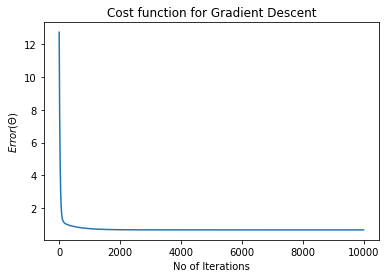

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 150
Training error: [0.97012371]
No of iterations: 200
Training error: [0.93600281]
No of iterations: 250
Training error: [0.90655764]
No of iterations: 300
Training error: [0.88051727]
No of iterations: 350
Training error: [0.85749183]
No of iterations: 400
Training error: [0.83714672]
No of iterations: 450
Training error: [0.81918037]
No of iterations: 500
Training error: [0.80332083]
No of iterations: 550
Training error: [0.78932358]
No of iterations: 600
Training error: [0.77696964]
No of iterations: 650
Training error: [0.76606362]
No of iterations: 700
Training error: [0.75643184]
No of iterations: 750
Training error: [0.74792044]
No of iterations: 800
Training error: [0.74039345]
No of iterations: 850
Training error: [0.73373111]
No of iterations: 900
Training error: [0.72782809]
No of iterations: 950
Training error: [0.72259193]
No of iterations: 1000
Training error: [0.7179416]
No of iterations: 1050
Training error: [0.71380614]
No of iterations: 1100
Trainin

No of iterations: 8200
Training error: [0.67126372]
No of iterations: 8250
Training error: [0.67124272]
No of iterations: 8300
Training error: [0.67122195]
No of iterations: 8350
Training error: [0.67120139]
No of iterations: 8400
Training error: [0.67118104]
No of iterations: 8450
Training error: [0.6711609]
No of iterations: 8500
Training error: [0.67114096]
No of iterations: 8550
Training error: [0.67112123]
No of iterations: 8600
Training error: [0.67110169]
No of iterations: 8650
Training error: [0.67108235]
No of iterations: 8700
Training error: [0.6710632]
No of iterations: 8750
Training error: [0.67104424]
No of iterations: 8800
Training error: [0.67102547]
No of iterations: 8850
Training error: [0.67100688]
No of iterations: 8900
Training error: [0.67098847]
No of iterations: 8950
Training error: [0.67097024]
No of iterations: 9000
Training error: [0.67095219]
No of iterations: 9050
Training error: [0.67093431]
No of iterations: 9100
Training error: [0.6709166]
No of iteration

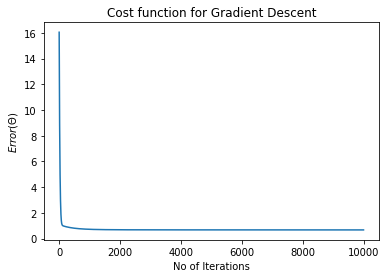

      Const        x1        x2         y  x1^0x2^2  x1^1x2^1  x1^2x2^0  \
0       NaN -1.438227 -0.453151  0.298472 -0.513049 -1.303989 -1.220006   
1       NaN -1.509401  0.509431 -0.953333  0.420272 -1.155197 -1.252873   
2       NaN -0.797655  0.383164 -0.728402  0.287718 -0.550270 -0.844263   
3       NaN -0.441782 -1.305043  0.719574 -1.190844 -0.884622 -0.573337   
4       NaN -0.512957 -0.292447 -0.776512 -0.369586 -0.549964 -0.631075   
5       NaN -0.584132 -0.807354 -0.785615 -0.811767 -0.791483 -0.687037   
6       NaN  0.483487  0.455316 -0.415345  0.363089  0.625064  0.338929   
7       NaN -0.157084 -0.479388 -0.494543 -0.536001 -0.354368 -0.324618   
8       NaN -0.157084 -0.136663 -0.566805 -0.225787 -0.206399 -0.324618   
9       NaN  1.479931 -0.790956  1.292543 -0.798469  0.648332  1.657139   
10      NaN -1.011179 -0.728642 -0.871106 -0.747465 -1.064039 -0.985500   
11      NaN  1.622280 -0.717163  1.200519 -0.737988  0.800607  1.873880   
12      NaN -1.153528  0.

No of iterations: 150
Training error: [0.9121831]
No of iterations: 200
Training error: [0.88049565]
No of iterations: 250
Training error: [0.8547417]
No of iterations: 300
Training error: [0.8328969]
No of iterations: 350
Training error: [0.81412134]
No of iterations: 400
Training error: [0.79789457]
No of iterations: 450
Training error: [0.78382054]
No of iterations: 500
Training error: [0.77157507]
No of iterations: 550
Training error: [0.76088738]
No of iterations: 600
Training error: [0.75153015]
No of iterations: 650
Training error: [0.74331234]
No of iterations: 700
Training error: [0.73607325]
No of iterations: 750
Training error: [0.72967758]
No of iterations: 800
Training error: [0.7240112]
No of iterations: 850
Training error: [0.71897764]
No of iterations: 900
Training error: [0.71449509]
No of iterations: 950
Training error: [0.71049398]
No of iterations: 1000
Training error: [0.70691494]
No of iterations: 1050
Training error: [0.7037071]
No of iterations: 1100
Training er

No of iterations: 8200
Training error: [0.66947715]
No of iterations: 8250
Training error: [0.66946199]
No of iterations: 8300
Training error: [0.66944696]
No of iterations: 8350
Training error: [0.66943204]
No of iterations: 8400
Training error: [0.66941724]
No of iterations: 8450
Training error: [0.66940255]
No of iterations: 8500
Training error: [0.66938797]
No of iterations: 8550
Training error: [0.6693735]
No of iterations: 8600
Training error: [0.66935914]
No of iterations: 8650
Training error: [0.66934488]
No of iterations: 8700
Training error: [0.66933073]
No of iterations: 8750
Training error: [0.66931668]
No of iterations: 8800
Training error: [0.66930274]
No of iterations: 8850
Training error: [0.66928889]
No of iterations: 8900
Training error: [0.66927514]
No of iterations: 8950
Training error: [0.66926149]
No of iterations: 9000
Training error: [0.66924793]
No of iterations: 9050
Training error: [0.66923447]
No of iterations: 9100
Training error: [0.6692211]
No of iteratio

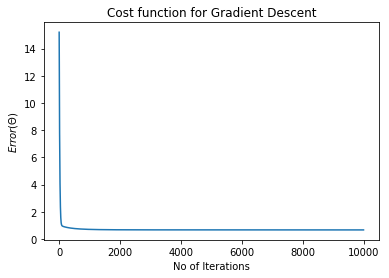


Training errors with GD without regularization : 

[array([0.44875626]), array([0.45060813]), array([0.45104029]), array([0.44885635]), array([0.44837593]), array([0.44785756]), array([0.4496696]), array([0.44903733]), array([0.44973644]), array([0.44755399])]

Testing errors with GD without regularization : 

[array([0.39573495]), array([0.39548887]), array([0.3982997]), array([0.39879934]), array([0.40046584]), array([0.40436184]), array([0.40434499]), array([0.41087018]), array([0.4091425]), array([0.39999716])]


In [12]:
# Gradient descent without regularization

global learnRate
learnRate = 0.001
flag = 0
print(df.head())

def CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))**0.5
    grad = 1/n * (x.transpose() @ (y_pred - y))[0:]
    return cost, grad

def gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it+=1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)
        
        
## NO REGULARIZATION ##
# GD
degree_errors_train = []
degree_errors_test = []

for i in range(1,11):
    l=0
    data_temp = transform_dataset(df,i)
    df_new = norms(data_temp)
    print(df_new)
    df_new['Const'] = df_new['Const'].fillna(1)
    print(df_new)
    #df_new = df_new.drop(columns=['Const'])
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,3]
    print(y_train)
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,3]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,3]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
    print(f"The final weights using Gradient Descent and degree {i} polynomial:\n",w)
    cur_error_train = testaccuracy(w,y_train,x_train)
    cur_error = testaccuracy(w,y_test,x_test)
    degree_errors_train.append(cur_error_train)
    degree_errors_test.append(cur_error)
    print("Testing Error:",testaccuracy(w,y_test,x_test))
    plt.plot(Error_history)
    plt.xlabel("No of Iterations")
    plt.ylabel("$Error(\Theta)$")
    plt.title("Cost function for Gradient Descent")
    plt.show()
    
print("\nTraining errors with GD without regularization : \n")
print(degree_errors_train)
print("\nTesting errors with GD without regularization : \n")
print(degree_errors_test)


In [13]:
finalerr = pd.DataFrame(degree_errors_train,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of training errors of all degrees is:",mean[0]) 
print("Variance of training errors of all degrees is:",var[0])
print("Minimum training error of all degrees is:",minx[0])

finalerr = pd.DataFrame(degree_errors_test,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of testing errors of all degrees is:",mean[0]) 
print("Variance of testing errors of all degrees is:",var[0])
print("Minimum testing error of all degrees is:",minx[0])

print(df.head())

Mean of training errors of all degrees is: 0.4491491874320846
Variance of training errors of all degrees is: 1.264890848588683e-06
Minimum training error of all degrees is: 0.44755398739176294
Mean of testing errors of all degrees is: 0.4017505381708813
Variance of testing errors of all degrees is: 2.8010842015023184e-05
Minimum testing error of all degrees is: 0.39548887032884433
   Nothing  age     bmi      charges
0        1   19  27.900  16884.92400
1        1   18  33.770   1725.55230
2        1   28  33.000   4449.46200
3        1   33  22.705  21984.47061
4        1   32  28.880   3866.85520


Stochastic Gradient descent without regularization

   Nothing  age     bmi      charges
0        1   19  27.900  16884.92400
1        1   18  33.770   1725.55230
2        1   28  33.000   4449.46200
3        1   33  22.705  21984.47061
4        1   32  28.880   3866.85520
No of iterations: 3
Training error: [0.54070585]
The final weights using Stochastic Gradient Descent and degree 1 polynomial:
 [[0.12418842]
 [0.56872764]]
Testing Error: [0.46476377]


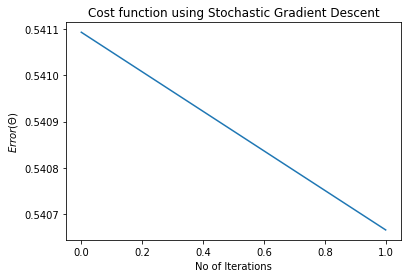

No of iterations: 4
Training error: [2.81170323]
The final weights using Stochastic Gradient Descent and degree 2 polynomial:
 [[0.67359064]
 [0.48126353]
 [0.04183062]
 [0.79877167]
 [0.9357711 ]]
Testing Error: [2.92130309]


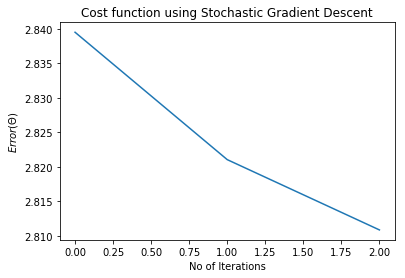

No of iterations: 4
Training error: [3.38761149]
The final weights using Stochastic Gradient Descent and degree 3 polynomial:
 [[0.73793209]
 [0.01130182]
 [0.44849295]
 [0.84844203]
 [0.15052724]
 [0.30165911]
 [0.21238546]
 [0.39658106]
 [0.14658035]]
Testing Error: [3.35863885]


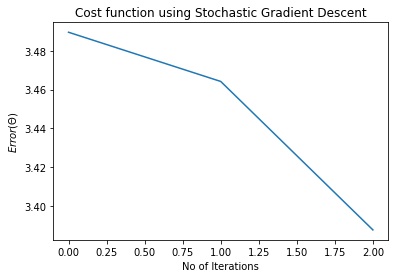

No of iterations: 29
Training error: [7.00575456]
The final weights using Stochastic Gradient Descent and degree 4 polynomial:
 [[ 0.138275  ]
 [ 0.77927749]
 [ 0.15132366]
 [ 0.61251719]
 [ 0.49056079]
 [ 0.06647599]
 [ 0.14822497]
 [-0.1554356 ]
 [ 0.05420804]
 [ 0.49831099]
 [ 0.48119845]
 [ 0.29458799]
 [ 0.7942178 ]
 [ 0.40036509]]
Testing Error: [6.55098653]


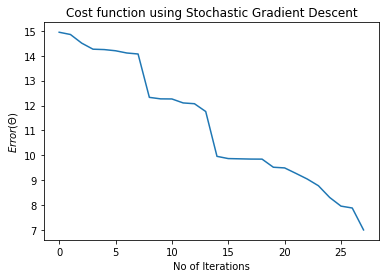

No of iterations: 19
Training error: [11.50180362]
The final weights using Stochastic Gradient Descent and degree 5 polynomial:
 [[ 0.53890716]
 [ 0.32796629]
 [ 0.19619731]
 [ 0.33384735]
 [ 0.53818527]
 [ 0.03693722]
 [ 0.02906819]
 [ 0.01993433]
 [ 0.13978827]
 [-0.11732256]
 [ 0.39996136]
 [ 0.5213997 ]
 [ 0.76847237]
 [ 0.19651875]
 [ 0.06975169]
 [ 0.72285447]
 [-0.07753676]
 [ 0.25187361]
 [ 0.18455908]
 [ 0.70181706]]
Testing Error: [11.50564841]


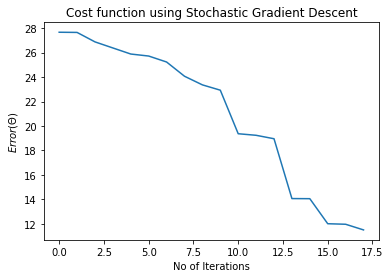

No of iterations: 23
Training error: [12.44436585]
The final weights using Stochastic Gradient Descent and degree 6 polynomial:
 [[ 0.78356427]
 [ 0.33869272]
 [-0.09406038]
 [-0.03631572]
 [ 0.26876469]
 [ 0.20741033]
 [ 0.05256432]
 [-0.13928226]
 [ 0.73783174]
 [-0.02075785]
 [-0.22181545]
 [ 0.60920374]
 [-0.0933941 ]
 [ 0.39955986]
 [ 0.69028667]
 [ 0.35774233]
 [-0.08461123]
 [-0.05236679]
 [ 0.44894487]
 [ 0.45150422]
 [ 0.81507791]
 [ 0.17570212]
 [ 0.40277204]
 [ 0.46086882]
 [ 0.01613825]
 [ 0.20971108]
 [-0.09001728]]
Testing Error: [11.63359433]


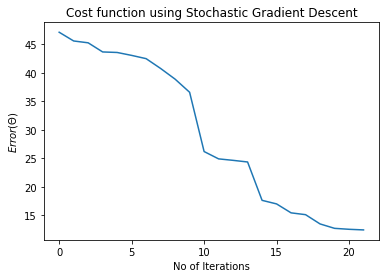

No of iterations: 26
Training error: [5.0239401]
The final weights using Stochastic Gradient Descent and degree 7 polynomial:
 [[ 0.59476313]
 [ 0.18913488]
 [ 0.39218407]
 [ 0.2779644 ]
 [ 0.22654786]
 [-0.10464801]
 [-0.05863017]
 [ 0.40123408]
 [ 0.26653975]
 [ 0.58427198]
 [ 0.23353225]
 [ 0.11061539]
 [-0.20696123]
 [ 0.03145861]
 [ 0.54681308]
 [ 0.29055834]
 [ 0.09793112]
 [ 0.31046019]
 [-0.17057201]
 [ 0.34792338]
 [ 0.13285245]
 [ 0.38460635]
 [ 0.16104153]
 [-0.23061122]
 [-0.20161569]
 [ 0.22241651]
 [-0.3021066 ]
 [ 0.44771502]
 [-0.07506157]
 [-0.43370606]
 [-0.41990922]
 [-0.29437554]
 [ 0.34110363]
 [-0.05138899]
 [ 0.1903033 ]]
Testing Error: [4.43204137]


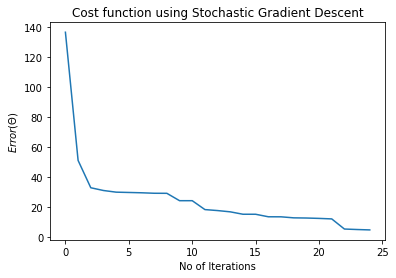

No of iterations: 23
Training error: [35.47998081]
The final weights using Stochastic Gradient Descent and degree 8 polynomial:
 [[ 0.52775967]
 [ 0.52737488]
 [ 0.45844572]
 [ 0.25926723]
 [ 0.41506235]
 [ 0.09401297]
 [ 0.23122004]
 [-0.22428798]
 [-0.07981515]
 [-0.04124585]
 [-0.09189815]
 [-0.06000161]
 [ 0.10627133]
 [ 0.64593736]
 [-0.0791869 ]
 [-0.2260548 ]
 [-0.28560767]
 [ 0.01950906]
 [ 0.58295836]
 [ 0.47844856]
 [ 0.8033817 ]
 [ 0.52836086]
 [ 0.08954249]
 [-0.11892934]
 [ 0.67102924]
 [ 0.11502692]
 [ 0.66701335]
 [ 0.34747997]
 [ 0.25360472]
 [-0.03681326]
 [-0.29937349]
 [ 0.22187759]
 [ 0.07956258]
 [ 0.58848293]
 [ 0.46863989]
 [ 0.25457922]
 [ 0.09661548]
 [ 0.42216712]
 [-0.1003359 ]
 [ 0.06355233]
 [ 0.02787271]
 [ 0.15056334]
 [ 0.03925353]
 [-0.06616379]]
Testing Error: [18.98946939]


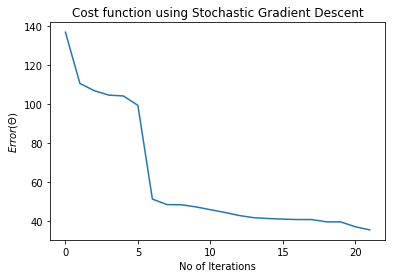

No of iterations: 5
Training error: [184.35540791]
The final weights using Stochastic Gradient Descent and degree 9 polynomial:
 [[-0.06168511]
 [ 0.38943736]
 [ 0.58646818]
 [ 0.45670358]
 [ 0.5866172 ]
 [ 0.1514283 ]
 [-0.06076071]
 [ 0.30535999]
 [ 0.28225102]
 [ 0.91116776]
 [ 0.61212594]
 [ 0.59964818]
 [ 0.06415437]
 [ 0.65588368]
 [ 0.56672537]
 [ 0.64580136]
 [ 0.60130105]
 [ 0.79241942]
 [ 0.79755232]
 [ 0.55750277]
 [ 0.26067822]
 [ 0.64296301]
 [ 0.66307873]
 [ 0.82246771]
 [ 0.42785587]
 [ 0.31738159]
 [ 0.73250948]
 [ 0.48795378]
 [ 0.88079509]
 [ 0.08783733]
 [ 0.32096464]
 [ 0.69980007]
 [ 0.39517259]
 [ 0.33459583]
 [ 0.20233448]
 [ 0.46158465]
 [ 0.53687649]
 [ 0.18815113]
 [ 0.57871627]
 [ 0.1934083 ]
 [ 0.29230839]
 [ 0.29408372]
 [ 0.0244604 ]
 [-0.10243389]
 [ 0.09285119]
 [ 0.83748406]
 [ 0.27834989]
 [-0.06788691]
 [ 0.59781283]
 [ 0.05681447]
 [ 0.54486764]
 [ 0.25509361]
 [ 0.02562249]
 [ 0.49113663]]
Testing Error: [154.10862887]


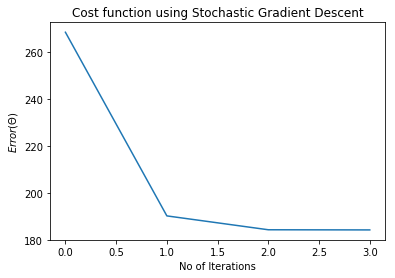

No of iterations: 25
Training error: [12.24603845]
The final weights using Stochastic Gradient Descent and degree 10 polynomial:
 [[-0.15951651]
 [ 0.23335528]
 [-0.29636618]
 [ 0.52989134]
 [ 0.11192304]
 [ 0.01779003]
 [ 0.37200335]
 [-0.15437214]
 [ 0.32140292]
 [ 0.20083258]
 [-0.53330544]
 [ 0.30115334]
 [ 0.26301031]
 [-0.00488926]
 [-0.40830042]
 [-0.31421219]
 [-0.36453803]
 [ 0.23051454]
 [ 0.37312003]
 [ 0.43527775]
 [ 0.03166374]
 [-0.3394618 ]
 [-0.37033229]
 [ 0.15162983]
 [-0.00364674]
 [ 0.02731222]
 [-0.11502128]
 [-0.1050997 ]
 [-0.61239207]
 [-0.43994564]
 [-0.36320865]
 [-0.11310232]
 [-0.30556798]
 [ 0.2855163 ]
 [ 0.42058674]
 [-0.48883184]
 [ 0.15733246]
 [ 0.00447282]
 [ 0.09002214]
 [-0.23739061]
 [ 0.56640128]
 [ 0.22804663]
 [ 0.07610192]
 [-0.08826253]
 [-0.11947283]
 [ 0.13107009]
 [-0.42353698]
 [-0.07698236]
 [ 0.37318864]
 [ 0.15680787]
 [-0.00549367]
 [ 0.36634291]
 [ 0.17741974]
 [ 0.03530848]
 [-0.25477159]
 [-0.55096495]
 [-0.76461947]
 [ 0.03166924]


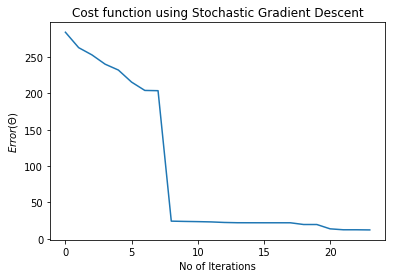


Training errors with SGD without regularization : 

[array([0.54070585]), array([2.81170323]), array([3.38761149]), array([7.00575456]), array([11.50180362]), array([12.44436585]), array([5.0239401]), array([35.47998081]), array([184.35540791]), array([12.24603845])]

Testing errors with SGD without regularization : 

[array([0.46476377]), array([2.92130309]), array([3.35863885]), array([6.55098653]), array([11.50564841]), array([11.63359433]), array([4.43204137]), array([18.98946939]), array([154.10862887]), array([12.79679123])]


In [14]:
# Stochastic Gradient descent without regularization


print(df.head())
global learnRate
learnRate = 0.001
flag = 0
global l
l = 0

def SCostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    i=np.random.choice(np.arange(len(y)))
    x1=x[i]
    x1=x1.reshape(1,x.shape[1])
    y_pred = x1 @ w
    error = (y_pred - y[i])**2
    x1=x1.reshape(x.shape[1],1)
    y1=y_pred-y[i]
    grad = x1 @ y1
    return grad

def SgradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        grad = SCostFunction(w,x,y)
        cost = testaccuracy(w,y,x)
        w = w - (learnRate * grad)
        it=it+1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-6)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)

        
degree_errors_train = []
degree_errors_test = []
for i in range(1,11):
    l=0
    data_temp = transform_dataset(df,i)
    df_new = norms(data_temp)
    df_new = df_new.drop(columns=['Const'])
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,2]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,2]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,2]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = SgradientDescent(initial_w,x_train,y_train,10000)
    print(f"The final weights using Stochastic Gradient Descent and degree {i} polynomial:\n",w)
    cur_error = testaccuracy(w,y_test,x_test)
    degree_errors_train.append(train_err)
    degree_errors_test.append(cur_error)
    print("Testing Error:",testaccuracy(w,y_test,x_test))
    plt.plot(Error_history)
    plt.xlabel("No of Iterations")
    plt.ylabel("$Error(\Theta)$")
    plt.title("Cost function using Stochastic Gradient Descent")
    plt.show()

print("\nTraining errors with SGD without regularization : \n")
print(degree_errors_train)
print("\nTesting errors with SGD without regularization : \n")
print(degree_errors_test)


In [15]:
finalerr = pd.DataFrame(degree_errors_train,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of training errors of all degrees is:",mean[0]) 
print("Variance of training errors of all degrees is:",var[0])
print("Minimum training error of all degrees is:",minx[0])

finalerr = pd.DataFrame(degree_errors_test,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of testing errors of all degrees is:",mean[0]) 
print("Variance of testing errors of all degrees is:",var[0])
print("Minimum testing error of all degrees is:",minx[0])

Mean of training errors of all degrees is: 27.479731187958514
Variance of training errors of all degrees is: 3136.1669899272065
Minimum training error of all degrees is: 0.5407058497167612
Mean of testing errors of all degrees is: 22.6761865823521
Variance of testing errors of all degrees is: 2164.671363921498
Minimum testing error of all degrees is: 0.4647637709062267


Gradient descent with L1 regularization

No of iterations: 50
Training error: [0.44928044]
No of iterations: 100
Training error: [0.44924922]
No of iterations: 150
Training error: [0.44922107]
No of iterations: 200
Training error: [0.44919569]
No of iterations: 250
Training error: [0.4491728]
No of iterations: 300
Training error: [0.44915215]
No of iterations: 350
Training error: [0.44913352]
No of iterations: 400
Training error: [0.44911672]
No of iterations: 450
Training error: [0.44910155]
No of iterations: 500
Training error: [0.44908786]
No of iterations: 550
Training error: [0.4490755]
No of iterations: 600
Training error: [0.44906434]
No of iterations: 650
Training error: [0.44905427]
No of iterations: 700
Training error: [0.44904517]
No of iterations: 750
Training error: [0.44903695]
No of iterations: 800
Training error: [0.44902952]
No of iterations: 850
Training error: [0.44902281]
No of iterations: 900
Training error: [0.44901675]
No of iterations: 950
Training error: [0.44901126]
No of iterations: 971
Training err

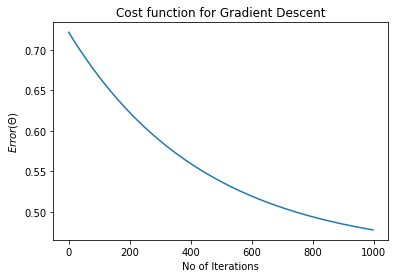

No of iterations: 50
Training error: [0.79234664]
No of iterations: 100
Training error: [0.70983375]
No of iterations: 150
Training error: [0.64820212]
No of iterations: 200
Training error: [0.60201076]
No of iterations: 250
Training error: [0.56726026]
No of iterations: 300
Training error: [0.54101806]
No of iterations: 350
Training error: [0.52112114]
No of iterations: 400
Training error: [0.50599028]
No of iterations: 450
Training error: [0.4944207]
No of iterations: 500
Training error: [0.48553244]
No of iterations: 550
Training error: [0.47867154]
No of iterations: 600
Training error: [0.47334979]
No of iterations: 650
Training error: [0.46920158]
No of iterations: 700
Training error: [0.46595218]
No of iterations: 750
Training error: [0.46339437]
No of iterations: 800
Training error: [0.46137124]
No of iterations: 850
Training error: [0.4597635]
No of iterations: 900
Training error: [0.45848003]
No of iterations: 950
Training error: [0.45745094]
No of iterations: 1000
Training er

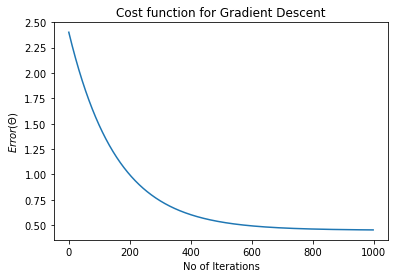

No of iterations: 50
Training error: [5.06131154]
No of iterations: 100
Training error: [2.97886138]
No of iterations: 150
Training error: [1.84456325]
No of iterations: 200
Training error: [1.22535834]
No of iterations: 250
Training error: [0.88631553]
No of iterations: 300
Training error: [0.69990479]
No of iterations: 350
Training error: [0.59683605]
No of iterations: 400
Training error: [0.53941599]
No of iterations: 450
Training error: [0.50710477]
No of iterations: 500
Training error: [0.48868354]
No of iterations: 550
Training error: [0.47800489]
No of iterations: 600
Training error: [0.47168556]
No of iterations: 650
Training error: [0.46785254]
No of iterations: 700
Training error: [0.46546073]
No of iterations: 750
Training error: [0.46392096]
No of iterations: 800
Training error: [0.46289663]
No of iterations: 850
Training error: [0.46219224]
No of iterations: 900
Training error: [0.46169196]
No of iterations: 950
Training error: [0.46132551]
No of iterations: 1000
Training 

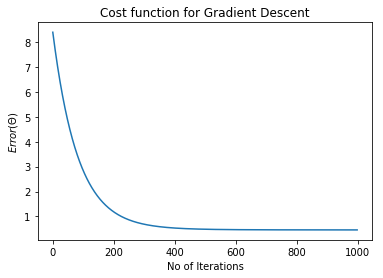

No of iterations: 50
Training error: [7.39301473]
No of iterations: 100
Training error: [3.13091662]
No of iterations: 150
Training error: [1.51365402]
No of iterations: 200
Training error: [0.89070449]
No of iterations: 250
Training error: [0.64465524]
No of iterations: 300
Training error: [0.54346076]
No of iterations: 350
Training error: [0.49932103]
No of iterations: 400
Training error: [0.47853075]
No of iterations: 450
Training error: [0.46784567]
No of iterations: 500
Training error: [0.4618775]
No of iterations: 550
Training error: [0.45830787]
No of iterations: 600
Training error: [0.45606333]
No of iterations: 650
Training error: [0.45460273]
No of iterations: 700
Training error: [0.45362944]
No of iterations: 750
Training error: [0.45296903]
No of iterations: 800
Training error: [0.45251358]
No of iterations: 850
Training error: [0.45219401]
No of iterations: 900
Training error: [0.45196518]
No of iterations: 950
Training error: [0.45179724]
No of iterations: 1000
Training e

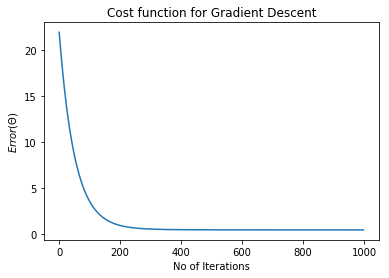

No of iterations: 50
Training error: [11.55499346]
No of iterations: 100
Training error: [3.10057962]
No of iterations: 150
Training error: [1.10073816]
No of iterations: 200
Training error: [0.6261873]
No of iterations: 250
Training error: [0.51252344]
No of iterations: 300
Training error: [0.48447795]
No of iterations: 350
Training error: [0.47690055]
No of iterations: 400
Training error: [0.47431468]
No of iterations: 450
Training error: [0.4730083]
No of iterations: 500
Training error: [0.47207114]
No of iterations: 550
Training error: [0.47126764]
No of iterations: 600
Training error: [0.47052972]
No of iterations: 650
Training error: [0.46983369]
No of iterations: 700
Training error: [0.46916924]
No of iterations: 750
Training error: [0.46853096]
No of iterations: 800
Training error: [0.46791563]
No of iterations: 850
Training error: [0.46732117]
No of iterations: 900
Training error: [0.46674612]
No of iterations: 950
Training error: [0.4661894]
No of iterations: 1000
Training er

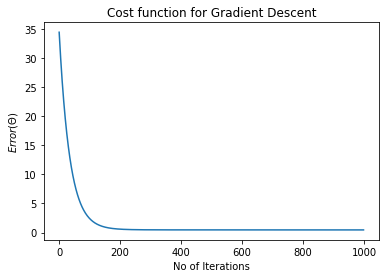

No of iterations: 50
Training error: [7.57054594]
No of iterations: 100
Training error: [1.92118407]
No of iterations: 150
Training error: [1.01216827]
No of iterations: 200
Training error: [0.8169878]
No of iterations: 250
Training error: [0.74940327]
No of iterations: 300
Training error: [0.714242]
No of iterations: 350
Training error: [0.6913101]
No of iterations: 400
Training error: [0.67425081]
No of iterations: 450
Training error: [0.66036696]
No of iterations: 500
Training error: [0.648356]
No of iterations: 550
Training error: [0.63755457]
No of iterations: 600
Training error: [0.62761448]
No of iterations: 650
Training error: [0.61834652]
No of iterations: 700
Training error: [0.60964242]
No of iterations: 750
Training error: [0.60143545]
No of iterations: 800
Training error: [0.59368095]
No of iterations: 850
Training error: [0.58635341]
No of iterations: 900
Training error: [0.57941721]
No of iterations: 950
Training error: [0.57284907]
No of iterations: 1000
Training error:

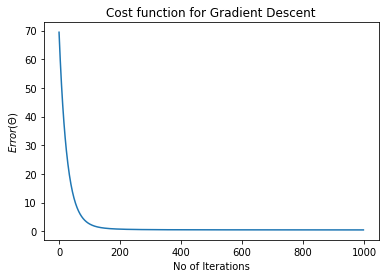

No of iterations: 50
Training error: [9.07267768]
No of iterations: 100
Training error: [1.17341443]
No of iterations: 150
Training error: [0.56828766]
No of iterations: 200
Training error: [0.51750677]
No of iterations: 250
Training error: [0.50936924]
No of iterations: 300
Training error: [0.50490236]
No of iterations: 350
Training error: [0.50106124]
No of iterations: 400
Training error: [0.49756181]
No of iterations: 450
Training error: [0.49434752]
No of iterations: 500
Training error: [0.49138834]
No of iterations: 550
Training error: [0.48866121]
No of iterations: 600
Training error: [0.48614657]
No of iterations: 650
Training error: [0.4838271]
No of iterations: 700
Training error: [0.48168718]
No of iterations: 750
Training error: [0.47971254]
No of iterations: 800
Training error: [0.47789011]
No of iterations: 850
Training error: [0.47620791]
No of iterations: 900
Training error: [0.4746549]
No of iterations: 950
Training error: [0.47322094]
No of iterations: 1000
Training er

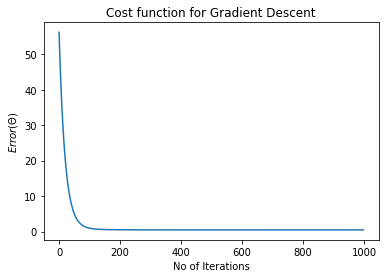

No of iterations: 50
Training error: [8.2708974]
No of iterations: 100
Training error: [1.36712061]
No of iterations: 150
Training error: [0.91421232]
No of iterations: 200
Training error: [0.80658977]
No of iterations: 250
Training error: [0.7491704]
No of iterations: 300
Training error: [0.70926452]
No of iterations: 350
Training error: [0.67778437]
No of iterations: 400
Training error: [0.65134769]
No of iterations: 450
Training error: [0.62851709]
No of iterations: 500
Training error: [0.60856713]
No of iterations: 550
Training error: [0.59106133]
No of iterations: 600
Training error: [0.57566986]
No of iterations: 650
Training error: [0.56211743]
No of iterations: 700
Training error: [0.5501795]
No of iterations: 750
Training error: [0.53966371]
No of iterations: 800
Training error: [0.53040523]
No of iterations: 850
Training error: [0.52224604]
No of iterations: 900
Training error: [0.51505463]
No of iterations: 950
Training error: [0.50871533]
No of iterations: 1000
Training err

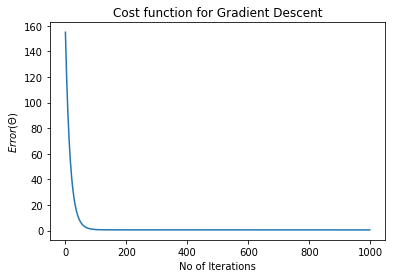

No of iterations: 50
Training error: [6.43638339]
No of iterations: 100
Training error: [1.52414435]
No of iterations: 150
Training error: [1.22743945]
No of iterations: 200
Training error: [1.09053999]
No of iterations: 250
Training error: [0.98918874]
No of iterations: 300
Training error: [0.90722836]
No of iterations: 350
Training error: [0.83891779]
No of iterations: 400
Training error: [0.78135573]
No of iterations: 450
Training error: [0.73264166]
No of iterations: 500
Training error: [0.69133566]
No of iterations: 550
Training error: [0.65627032]
No of iterations: 600
Training error: [0.6264781]
No of iterations: 650
Training error: [0.60114252]
No of iterations: 700
Training error: [0.57957842]
No of iterations: 750
Training error: [0.56120876]
No of iterations: 800
Training error: [0.54554883]
No of iterations: 850
Training error: [0.53218508]
No of iterations: 900
Training error: [0.52077033]
No of iterations: 950
Training error: [0.51101121]
No of iterations: 1000
Training e

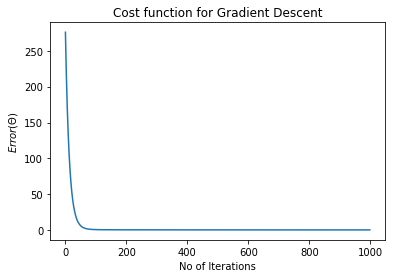

No of iterations: 50
Training error: [4.75155546]
No of iterations: 100
Training error: [1.04701599]
No of iterations: 150
Training error: [0.87891068]
No of iterations: 200
Training error: [0.80114585]
No of iterations: 250
Training error: [0.74569358]
No of iterations: 300
Training error: [0.70154452]
No of iterations: 350
Training error: [0.66514778]
No of iterations: 400
Training error: [0.63478366]
No of iterations: 450
Training error: [0.60932015]
No of iterations: 500
Training error: [0.58789588]
No of iterations: 550
Training error: [0.56982048]
No of iterations: 600
Training error: [0.55453135]
No of iterations: 650
Training error: [0.54156863]
No of iterations: 700
Training error: [0.53055176]
No of iterations: 750
Training error: [0.52116607]
No of iterations: 800
Training error: [0.51315193]
No of iterations: 850
Training error: [0.50629391]
No of iterations: 900
Training error: [0.50041271]
No of iterations: 950
Training error: [0.49535877]
No of iterations: 1000
Training 

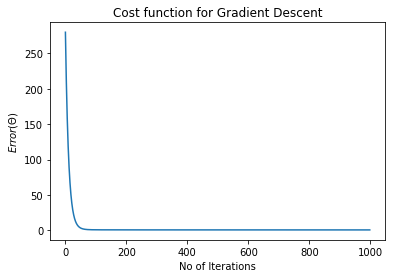


Training errors with GD with L1 regularization : 

[array([0.47755148]), array([0.45305054]), array([0.45407444]), array([0.46488225]), array([0.45520322]), array([0.48930888]), array([0.46551153]), array([0.48252926]), array([0.47509993]), array([0.46735471])]

Testing errors with GD with L1 regularization : 

[array([0.46687321]), array([0.45246641]), array([0.45116727]), array([0.45246702]), array([0.46223921]), array([0.4830302]), array([0.46561167]), array([0.50454737]), array([0.49439037]), array([0.5061558])]


In [18]:
# Gradient descent with L1 regularization

import numpy as np
import random

global learnRate
learnRate = 0.001
flag = 0
global l
l = 1

def reg_testaccuracy(w,y,x_test):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x_test @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    regularizedCost= cost + l/(n)*sum(abs(w))
    return regularizedCost

def L1CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x @ w
    error = (y_pred - y)**2
    cost = (1/(2*n)) * sum(error)
    regularizedCost= cost + (l/(n)*sum(abs(w)))
    grad = 1/n * (x.transpose() @ (y_pred - y))[0:] + (l/n)
    return regularizedCost, grad

def L1gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = L1CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it+=1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)
        
## L1 REGULARIZATION ##
## GD ##

degree_errors_train = []
degree_errors_test = []
best_lambda = []

min_error_validation = 100000000000000
for i in range(1,11):
    final_lambda=0.5
    min_error = 1000000000000000
    # use validation data to find best lambda
    for xp in range(1,6):
        l = random.randrange(2,10)
        l = 0.1*l
        data_temp = transform_dataset(df,i)
        df_new = norms(data_temp)
        df_new = df_new.drop(columns=['Const'])
        train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                           [int(.7*len(df_new)), int(.9*len(df_new))])
        y_train = train.iloc[:,2]
        #print(y_train)
        x_train = np.array(train.drop(columns=['y']))
        y_test = test.iloc[:,2]
        x_test = np.array(test.drop(columns=['y']))
        y_validate = validate.iloc[:,2]
        x_validate = np.array(validate.drop(columns=['y']))
        initial_w = np.random.rand(x_train.shape[1],1)
        train_err,w,Error_history = L1gradientDescent(initial_w,x_train,y_train,1000)
        cur_error = reg_testaccuracy(w,y_validate,x_validate)
        if(cur_error<min_error):
            min_error = cur_error
            final_lambda = l
    min_error_validation = min(min_error,min_error_validation)
    l = final_lambda
    best_lambda.append(final_lambda)
    data_temp = transform_dataset(df,i)
    df_new = norms(data_temp)
    df_new = df_new.drop(columns=['Const'])
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,2]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,2]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,2]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = L1gradientDescent(initial_w,x_train,y_train,1000)
    cur_error = reg_testaccuracy(w,y_validate,x_validate)
    print(f"The final weights using Gradient Descent, L1 Reg and degree {i} polynomial:\n",w)
    cur_error_train = reg_testaccuracy(w,y_train,x_train)
    degree_errors_train.append(cur_error_train)
    degree_errors_test.append(cur_error)
    print("Testing Error:",reg_testaccuracy(w,y_test,x_test))
    plt.plot(Error_history)
    plt.xlabel("No of Iterations")
    plt.ylabel("$Error(\Theta)$")
    plt.title("Cost function for Gradient Descent")
    plt.show()
    
print("\nTraining errors with GD with L1 regularization : \n")
print(degree_errors_train)
print("\nTesting errors with GD with L1 regularization : \n")
print(degree_errors_test)


In [19]:
print(best_lambda)
finalerr = pd.DataFrame(degree_errors_train,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of training errors of all degrees is:",mean[0]) 
print("Variance of training errors of all degrees is:",var[0])
print("Minimum training error of all degrees is:",minx[0])

finalerr = pd.DataFrame(degree_errors_test,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of testing errors of all degrees is:",mean[0]) 
print("Variance of testing errors of all degrees is:",var[0])
print("Minimum testing error of all degrees is:",minx[0])
print("Minimum validation error of all degrees is:",min_error_validation)


[0.5, 0.8, 0.2, 0.8, 0.4, 0.6000000000000001, 0.5, 0.30000000000000004, 0.30000000000000004, 0.7000000000000001]
Mean of training errors of all degrees is: 0.46845662401854316
Variance of training errors of all degrees is: 0.00015580188117957878
Minimum training error of all degrees is: 0.45305053990180605
Mean of testing errors of all degrees is: 0.47389485279099597
Variance of testing errors of all degrees is: 0.0004636120417608964
Minimum testing error of all degrees is: 0.4511672702780344
Minimum validation error of all degrees is: [0.43876576]


Gradient descent with L2 regularization

No of iterations: 50
Training error: [0.65326471]
No of iterations: 100
Training error: [0.63450054]
No of iterations: 150
Training error: [0.61748389]
No of iterations: 200
Training error: [0.60204947]
No of iterations: 250
Training error: [0.58804789]
No of iterations: 300
Training error: [0.57534408]
No of iterations: 350
Training error: [0.56381587]
No of iterations: 400
Training error: [0.55335282]
No of iterations: 450
Training error: [0.54385498]
No of iterations: 500
Training error: [0.53523196]
No of iterations: 550
Training error: [0.52740194]
No of iterations: 600
Training error: [0.5202909]
No of iterations: 650
Training error: [0.5138318]
No of iterations: 700
Training error: [0.50796399]
No of iterations: 750
Training error: [0.50263251]
No of iterations: 800
Training error: [0.49778762]
No of iterations: 850
Training error: [0.49338425]
No of iterations: 900
Training error: [0.48938156]
No of iterations: 950
Training error: [0.48574256]
No of iterations: 1000
Training er

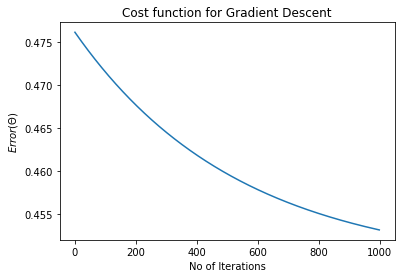

No of iterations: 50
Training error: [0.80858669]
No of iterations: 100
Training error: [0.71132356]
No of iterations: 150
Training error: [0.64064094]
No of iterations: 200
Training error: [0.58927387]
No of iterations: 250
Training error: [0.55194305]
No of iterations: 300
Training error: [0.52481214]
No of iterations: 350
Training error: [0.50509336]
No of iterations: 400
Training error: [0.49076086]
No of iterations: 450
Training error: [0.48034251]
No of iterations: 500
Training error: [0.47276853]
No of iterations: 550
Training error: [0.46726155]
No of iterations: 600
Training error: [0.46325665]
No of iterations: 650
Training error: [0.46034331]
No of iterations: 700
Training error: [0.45822321]
No of iterations: 750
Training error: [0.45667957]
No of iterations: 800
Training error: [0.45555486]
No of iterations: 850
Training error: [0.4547346]
No of iterations: 900
Training error: [0.45413559]
No of iterations: 950
Training error: [0.45369737]
No of iterations: 1000
Training e

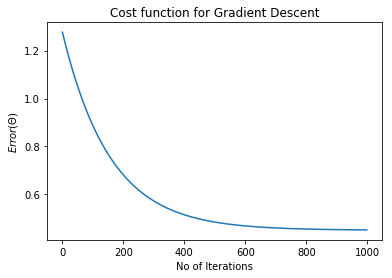

No of iterations: 50
Training error: [5.2260245]
No of iterations: 100
Training error: [3.04991615]
No of iterations: 150
Training error: [1.86922888]
No of iterations: 200
Training error: [1.22814907]
No of iterations: 250
Training error: [0.87969883]
No of iterations: 300
Training error: [0.69002777]
No of iterations: 350
Training error: [0.58657422]
No of iterations: 400
Training error: [0.52998583]
No of iterations: 450
Training error: [0.49890867]
No of iterations: 500
Training error: [0.48174634]
No of iterations: 550
Training error: [0.47219449]
No of iterations: 600
Training error: [0.46682067]
No of iterations: 650
Training error: [0.46375221]
No of iterations: 700
Training error: [0.46196451]
No of iterations: 750
Training error: [0.46089482]
No of iterations: 800
Training error: [0.46023242]
No of iterations: 850
Training error: [0.45980456]
No of iterations: 900
Training error: [0.45951429]
No of iterations: 950
Training error: [0.45930654]
No of iterations: 1000
Training e

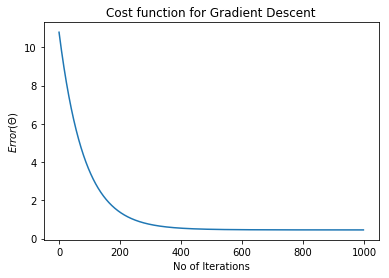

No of iterations: 50
Training error: [6.51275047]
No of iterations: 100
Training error: [2.80351107]
No of iterations: 150
Training error: [1.39285078]
No of iterations: 200
Training error: [0.84731565]
No of iterations: 250
Training error: [0.63038394]
No of iterations: 300
Training error: [0.54025398]
No of iterations: 350
Training error: [0.5003619]
No of iterations: 400
Training error: [0.4812206]
No of iterations: 450
Training error: [0.4711848]
No of iterations: 500
Training error: [0.46546798]
No of iterations: 550
Training error: [0.46198418]
No of iterations: 600
Training error: [0.45975224]
No of iterations: 650
Training error: [0.45826929]
No of iterations: 700
Training error: [0.45725566]
No of iterations: 750
Training error: [0.45654508]
No of iterations: 800
Training error: [0.45603388]
No of iterations: 850
Training error: [0.45565543]
No of iterations: 900
Training error: [0.45536604]
No of iterations: 950
Training error: [0.45513678]
No of iterations: 1000
Training err

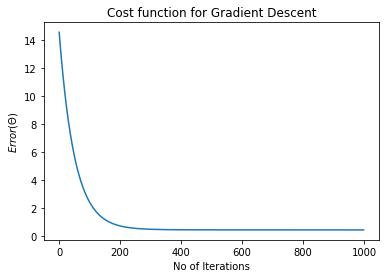

No of iterations: 50
Training error: [8.94686753]
No of iterations: 100
Training error: [2.64334745]
No of iterations: 150
Training error: [1.08876519]
No of iterations: 200
Training error: [0.68241871]
No of iterations: 250
Training error: [0.56302175]
No of iterations: 300
Training error: [0.52069538]
No of iterations: 350
Training error: [0.50205541]
No of iterations: 400
Training error: [0.49224611]
No of iterations: 450
Training error: [0.48643605]
No of iterations: 500
Training error: [0.48270575]
No of iterations: 550
Training error: [0.48014376]
No of iterations: 600
Training error: [0.47826514]
No of iterations: 650
Training error: [0.47679644]
No of iterations: 700
Training error: [0.47557937]
No of iterations: 750
Training error: [0.47452116]
No of iterations: 800
Training error: [0.47356704]
No of iterations: 850
Training error: [0.47268452]
No of iterations: 900
Training error: [0.47185416]
No of iterations: 950
Training error: [0.47106422]
No of iterations: 1000
Training 

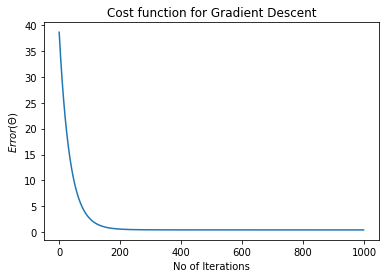

No of iterations: 50
Training error: [6.54038149]
No of iterations: 100
Training error: [1.4295941]
No of iterations: 150
Training error: [0.68212253]
No of iterations: 200
Training error: [0.55769784]
No of iterations: 250
Training error: [0.52852196]
No of iterations: 300
Training error: [0.51706211]
No of iterations: 350
Training error: [0.51040564]
No of iterations: 400
Training error: [0.50567072]
No of iterations: 450
Training error: [0.50190301]
No of iterations: 500
Training error: [0.49868629]
No of iterations: 550
Training error: [0.49581598]
No of iterations: 600
Training error: [0.49318629]
No of iterations: 650
Training error: [0.49074043]
No of iterations: 700
Training error: [0.48844641]
No of iterations: 750
Training error: [0.48628491]
No of iterations: 800
Training error: [0.4842432]
No of iterations: 850
Training error: [0.48231203]
No of iterations: 900
Training error: [0.48048407]
No of iterations: 950
Training error: [0.47875311]
No of iterations: 1000
Training er

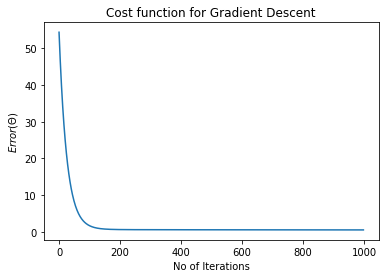

No of iterations: 50
Training error: [8.37051694]
No of iterations: 100
Training error: [1.46386187]
No of iterations: 150
Training error: [0.80191699]
No of iterations: 200
Training error: [0.68486291]
No of iterations: 250
Training error: [0.64011336]
No of iterations: 300
Training error: [0.61466038]
No of iterations: 350
Training error: [0.5971177]
No of iterations: 400
Training error: [0.58343444]
No of iterations: 450
Training error: [0.5719018]
No of iterations: 500
Training error: [0.56175374]
No of iterations: 550
Training error: [0.55262524]
No of iterations: 600
Training error: [0.54432522]
No of iterations: 650
Training error: [0.53673968]
No of iterations: 700
Training error: [0.52979019]
No of iterations: 750
Training error: [0.52341596]
No of iterations: 800
Training error: [0.51756598]
No of iterations: 850
Training error: [0.51219549]
No of iterations: 900
Training error: [0.5072643]
No of iterations: 950
Training error: [0.50273593]
No of iterations: 1000
Training err

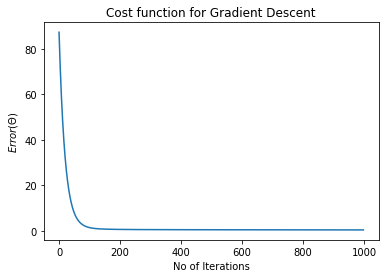

No of iterations: 50
Training error: [9.33669873]
No of iterations: 100
Training error: [0.98202127]
No of iterations: 150
Training error: [0.63354384]
No of iterations: 200
Training error: [0.60295399]
No of iterations: 250
Training error: [0.58836929]
No of iterations: 300
Training error: [0.57634185]
No of iterations: 350
Training error: [0.56566818]
No of iterations: 400
Training error: [0.55601143]
No of iterations: 450
Training error: [0.54721135]
No of iterations: 500
Training error: [0.53916888]
No of iterations: 550
Training error: [0.53181007]
No of iterations: 600
Training error: [0.52507323]
No of iterations: 650
Training error: [0.51890404]
No of iterations: 700
Training error: [0.51325363]
No of iterations: 750
Training error: [0.5080776]
No of iterations: 800
Training error: [0.50333549]
No of iterations: 850
Training error: [0.49899035]
No of iterations: 900
Training error: [0.49500843]
No of iterations: 950
Training error: [0.4913589]
No of iterations: 1000
Training er

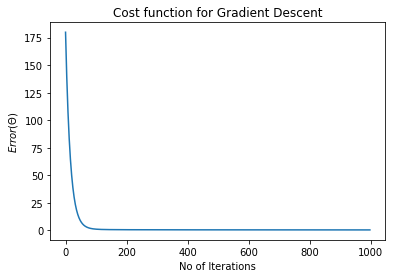

No of iterations: 50
Training error: [4.95039517]
No of iterations: 100
Training error: [0.62172188]
No of iterations: 150
Training error: [0.49367682]
No of iterations: 200
Training error: [0.47601261]
No of iterations: 250
Training error: [0.47001884]
No of iterations: 300
Training error: [0.46713103]
No of iterations: 350
Training error: [0.46524894]
No of iterations: 400
Training error: [0.46376573]
No of iterations: 450
Training error: [0.46249597]
No of iterations: 500
Training error: [0.46137586]
No of iterations: 550
Training error: [0.46037748]
No of iterations: 600
Training error: [0.45948428]
No of iterations: 650
Training error: [0.45868386]
No of iterations: 700
Training error: [0.45796588]
No of iterations: 750
Training error: [0.45732135]
No of iterations: 800
Training error: [0.4567423]
No of iterations: 850
Training error: [0.45622167]
No of iterations: 900
Training error: [0.45575317]
No of iterations: 950
Training error: [0.4553312]
No of iterations: 1000
Training er

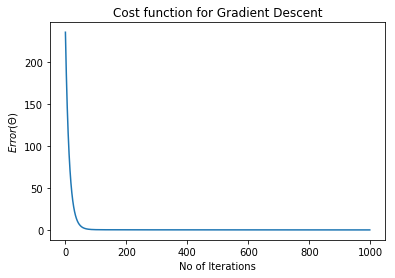

No of iterations: 50
Training error: [4.02598408]
No of iterations: 100
Training error: [0.56890897]
No of iterations: 150
Training error: [0.50725392]
No of iterations: 200
Training error: [0.49460354]
No of iterations: 250
Training error: [0.4880531]
No of iterations: 300
Training error: [0.48354933]
No of iterations: 350
Training error: [0.48007279]
No of iterations: 400
Training error: [0.47727511]
No of iterations: 450
Training error: [0.47498466]
No of iterations: 500
Training error: [0.47308957]
No of iterations: 550
Training error: [0.47150704]
No of iterations: 600
Training error: [0.47017306]
No of iterations: 650
Training error: [0.46903746]
No of iterations: 700
Training error: [0.46806073]
No of iterations: 750
Training error: [0.46721171]
No of iterations: 800
Training error: [0.46646576]
No of iterations: 850
Training error: [0.46580341]
No of iterations: 900
Training error: [0.46520923]
No of iterations: 950
Training error: [0.46467098]
No of iterations: 1000
Training e

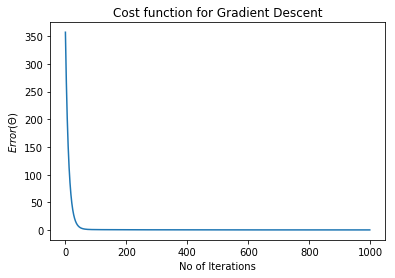


Training errors with GD with L2 regularization : 

[array([0.45313141]), array([0.45189962]), array([0.45010831]), array([0.4659483]), array([0.45029725]), array([0.52089093]), array([0.50519326]), array([0.48798371]), array([0.46232438]), array([0.46336145])]

Testing errors with GD with L2 regularization : 

[array([0.39485577]), array([0.39597341]), array([0.40412644]), array([0.43967594]), array([0.40616571]), array([0.4275764]), array([0.40793169]), array([0.44263782]), array([0.40663128]), array([0.42416051])]
[0.6000000000000001, 0.30000000000000004, 0.2, 0.2, 0.6000000000000001, 0.4, 0.6000000000000001, 0.7000000000000001, 0.5, 0.7000000000000001]


In [20]:
# Gradient descent with L2 regularization

import numpy as np
import random

global learnRate
learnRate = 0.001
flag = 0
global l
l = 1


def reg2_testaccuracy(w,y,x_test):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x_test @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    regularizedCost= cost + (l/(2*n)*sum(w**2))
    return regularizedCost

def L2CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x @ w
    error = (y_pred - y)**2
    cost = (1/(2*n)) * sum(error)
    regularizedCost= cost + l/(2*(n))*sum(w**2)
    grad = 1/n * (x.transpose() @ (y_pred - y))[0:] + (l/n)*w[0:]
    return regularizedCost, grad

def L2gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = L2CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it+=1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)
        
## L2 REGULARIZATION ##
## GD ##

degree_errors_train = []
degree_errors_test = []
best_lambda = []
min_error_validation = 100000000000000000000
for i in range(1,11):
    final_lambda=0.5
    min_error = 1000000000000000
    # use validation data to find best lambda
    for _ in range(1,6):
        l = random.randrange(2,10)
        l = 0.1*l
        data_temp = transform_dataset(df,i)
        df_new = norms(data_temp)
        df_new = df_new.drop(columns=['Const'])
        train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                           [int(.7*len(df_new)), int(.9*len(df_new))])
        y_train = train.iloc[:,2]
        x_train = np.array(train.drop(columns=['y']))
        y_test = test.iloc[:,2]
        x_test = np.array(test.drop(columns=['y']))
        y_validate = validate.iloc[:,2]
        x_validate = np.array(validate.drop(columns=['y']))
        initial_w = np.random.rand(x_train.shape[1],1)
        train_err,w,Error_history = L2gradientDescent(initial_w,x_train,y_train,1000)
        cur_error = reg2_testaccuracy(w,y_validate,x_validate)
        if(cur_error<min_error):
            min_error = cur_error
            final_lambda = l
    l = final_lambda
    best_lambda.append(final_lambda)
    min_error_validation = min(min_error,min_error_validation)
    data_temp = transform_dataset(df,i)
    df_new = norms(data_temp)
    df_new = df_new.drop(columns=['Const'])
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,2]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,2]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,2]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = L2gradientDescent(initial_w,x_train,y_train,1000)
    cur_error = reg2_testaccuracy(w,y_test,x_test)
    print(f"The final weights using Gradient Descent, L2 Reg and degree {i} polynomial:\n",w)
    cur_error = reg2_testaccuracy(w,y_test,x_test)
    cur_error_train = reg2_testaccuracy(w,y_train,x_train)
    degree_errors_train.append(cur_error_train)
    degree_errors_test.append(cur_error)
    print("Testing Error:",reg2_testaccuracy(w,y_test,x_test))
    plt.plot(Error_history)
    plt.xlabel("No of Iterations")
    plt.ylabel("$Error(\Theta)$")
    plt.title("Cost function for Gradient Descent")
    plt.show()
    
print("\nTraining errors with GD with L2 regularization : \n")
print(degree_errors_train)
print("\nTesting errors with GD with L2 regularization : \n")
print(degree_errors_test)
print(best_lambda)

In [21]:
finalerr = pd.DataFrame(degree_errors_train,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of training errors of all degrees is:",mean[0]) 
print("Variance of training errors of all degrees is:",var[0])
print("Minimum training error of all degrees is:",minx[0])

finalerr = pd.DataFrame(degree_errors_test,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of testing errors of all degrees is:",mean[0]) 
print("Variance of testing errors of all degrees is:",var[0])
print("Minimum testing error of all degrees is:",minx[0])
print("Minimum validation error of all degrees is:",min_error_validation)


Mean of training errors of all degrees is: 0.47111386324607346
Variance of training errors of all degrees is: 0.0006283235386683523
Minimum training error of all degrees is: 0.4501083067725264
Mean of testing errors of all degrees is: 0.4149734990975002
Variance of testing errors of all degrees is: 0.00029987787010639296
Minimum testing error of all degrees is: 0.3948557745777768
Minimum validation error of all degrees is: [0.4389425]


Stochastic Gradient descent with L1 regularization

No of iterations: 6
Training error: [0.55442]
No of iterations: 5
Training error: [0.63298421]
No of iterations: 3
Training error: [0.60949432]
No of iterations: 3
Training error: [0.66819093]
No of iterations: 4
Training error: [0.52448763]
No of iterations: 3
Training error: [0.70862752]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 1 polynomial:
 [[0.78129339]
 [0.26470209]]
Testing Error: [0.53589074]


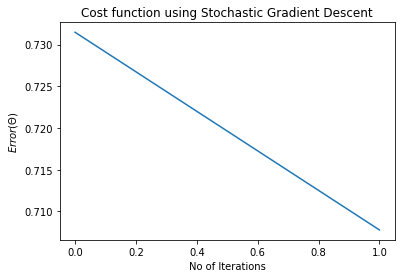

No of iterations: 5
Training error: [1.59654615]
No of iterations: 6
Training error: [0.48463422]
No of iterations: 4
Training error: [1.12587294]
No of iterations: 3
Training error: [1.10995729]
No of iterations: 5
Training error: [1.73180007]
No of iterations: 3
Training error: [0.55889338]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 2 polynomial:
 [[ 0.113329  ]
 [ 0.18815479]
 [ 0.06469533]
 [-0.00541127]
 [ 0.51771175]]
Testing Error: [0.46258128]


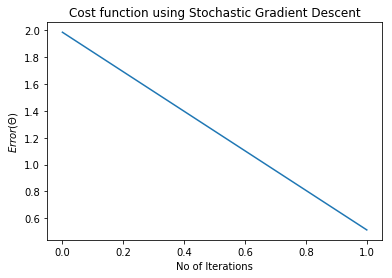

No of iterations: 7
Training error: [0.65077701]
No of iterations: 4
Training error: [1.02243116]
No of iterations: 6
Training error: [1.67424743]
No of iterations: 5
Training error: [1.81766521]
No of iterations: 4
Training error: [4.86448419]
No of iterations: 5
Training error: [20.50913295]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 3 polynomial:
 [[-0.97836772]
 [ 1.3196109 ]
 [ 1.57143   ]
 [-0.82967854]
 [-1.33567358]
 [ 1.95537366]
 [-1.14403803]
 [-0.79338894]
 [-0.54029415]]
Testing Error: [20.30514558]


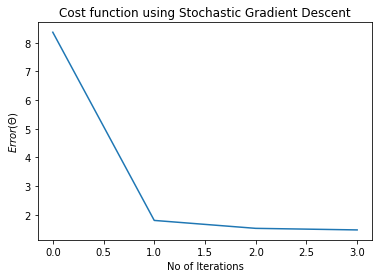

No of iterations: 6
Training error: [2.00582028]
No of iterations: 5
Training error: [6.56739237]
No of iterations: 7
Training error: [1.69605831]
No of iterations: 4
Training error: [5.66529351]
No of iterations: 3
Training error: [20.17880761]
No of iterations: 3
Training error: [4.94215777]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 4 polynomial:
 [[ 0.34881293]
 [ 1.05888124]
 [ 0.53904749]
 [ 0.08320987]
 [-0.03683122]
 [ 0.44849343]
 [ 0.02567745]
 [ 0.0691091 ]
 [-0.21203831]
 [-0.01949932]
 [ 0.63202986]
 [ 0.55121818]
 [ 0.61448502]
 [ 0.30998555]]
Testing Error: [5.73276458]


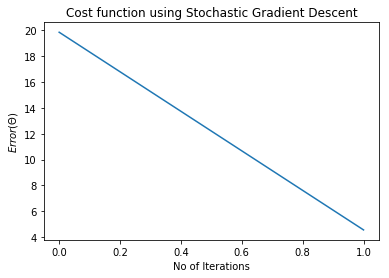

No of iterations: 3
Training error: [4.23698398]
No of iterations: 6
Training error: [64.53564625]
No of iterations: 3
Training error: [24.01813261]
No of iterations: 5
Training error: [32.79355301]
No of iterations: 3
Training error: [329.93457774]
No of iterations: 7
Training error: [1394.73767057]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 5 polynomial:
 [[-3.95861005]
 [ 7.06446888]
 [ 4.64051032]
 [-2.55141726]
 [-0.82038113]
 [ 2.49516676]
 [-2.71076353]
 [-1.24149863]
 [ 1.67958478]
 [-0.38286195]
 [-4.46282411]
 [-2.79484874]
 [ 1.0651151 ]
 [ 4.20029612]
 [-2.63442118]
 [-6.7260339 ]
 [-5.39461351]
 [-1.56265682]
 [ 2.44973717]
 [ 5.58612949]]
Testing Error: [95.0718502]


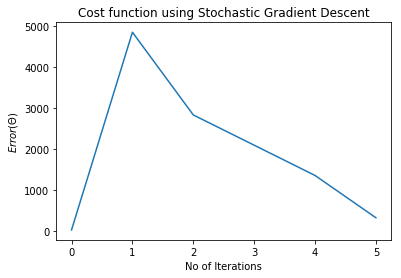

No of iterations: 3
Training error: [25.66028862]
No of iterations: 3
Training error: [15.01670064]
No of iterations: 5
Training error: [4946.50347501]
No of iterations: 5
Training error: [125.25806388]
No of iterations: 5
Training error: [18.83868446]
No of iterations: 6
Training error: [87.6182075]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 6 polynomial:
 [[-1.49782215]
 [ 0.91959822]
 [ 0.02498647]
 [-1.2983967 ]
 [-0.93089736]
 [ 0.51693398]
 [-0.51722546]
 [-1.28975244]
 [-0.86365159]
 [ 0.56917775]
 [-0.58199176]
 [-0.81033308]
 [-0.85770437]
 [-0.85759063]
 [-0.21703216]
 [-0.63652917]
 [-0.38911719]
 [-0.81731366]
 [-0.21624335]
 [ 0.00598577]
 [-0.35218181]
 [ 0.33554683]
 [ 0.06529825]
 [-0.59447772]
 [ 0.19357847]
 [-0.25710008]
 [-0.67096496]]
Testing Error: [71.68571589]


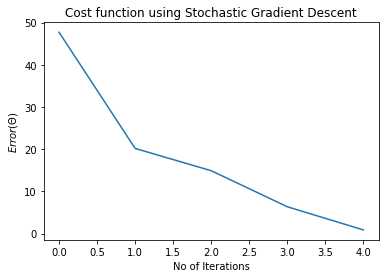

No of iterations: 4
Training error: [1327.83816807]
No of iterations: 6
Training error: [21.5438145]
No of iterations: 5
Training error: [7024.67404203]
No of iterations: 4
Training error: [486.49767143]
No of iterations: 3
Training error: [16.68641441]
No of iterations: 5
Training error: [9.83698741]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 7 polynomial:
 [[ 0.34483881]
 [-0.84617011]
 [-0.27128696]
 [-0.29169586]
 [ 0.19193906]
 [-0.47300594]
 [ 0.10745836]
 [ 0.35424489]
 [ 0.0650163 ]
 [-0.29766033]
 [ 0.16912381]
 [-0.57913922]
 [ 0.04436355]
 [-0.44715981]
 [ 0.37825782]
 [-0.07835537]
 [-0.03529211]
 [-0.17648146]
 [ 0.08229735]
 [ 0.36421018]
 [ 0.24688522]
 [-0.10106514]
 [ 0.01719058]
 [-0.59556788]
 [-0.57832964]
 [ 0.37889009]
 [-0.48211575]
 [ 0.27469858]
 [ 0.11322246]
 [-0.06526772]
 [ 0.23045716]
 [ 0.11562243]
 [ 0.15710488]
 [-0.25955039]
 [ 0.42076697]]
Testing Error: [2.21997501]


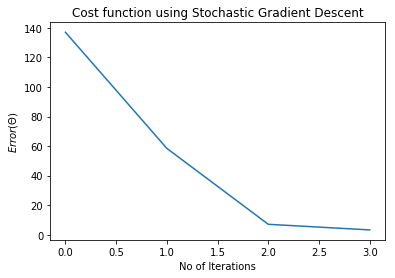

No of iterations: 3
Training error: [112.06723697]
No of iterations: 3
Training error: [76003.20148186]
No of iterations: 3
Training error: [4.61037392]
No of iterations: 7
Training error: [5078.5954081]
No of iterations: 3
Training error: [78.67318734]
No of iterations: 3
Training error: [421.9570699]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 8 polynomial:
 [[-0.36258263]
 [-0.08153393]
 [-0.23043937]
 [ 0.20823063]
 [ 0.11409178]
 [ 0.34220273]
 [ 0.50714792]
 [-0.36399926]
 [ 0.09150726]
 [ 0.80755395]
 [ 0.09534133]
 [ 0.03319549]
 [-0.3541922 ]
 [-0.02376874]
 [ 0.832503  ]
 [ 0.53300748]
 [ 0.93287742]
 [ 0.6322849 ]
 [ 0.10762258]
 [-0.21087234]
 [ 0.70519723]
 [ 0.69103074]
 [ 0.69853259]
 [ 0.05415442]
 [ 0.66747411]
 [ 0.13926379]
 [-0.42209501]
 [ 0.97306144]
 [ 1.34400385]
 [ 1.42321744]
 [ 0.71935743]
 [ 0.26215839]
 [ 0.58591097]
 [ 0.18436849]
 [-0.3437443 ]
 [ 1.42916217]
 [ 1.13287996]
 [ 0.97899628]
 [ 0.55107076]
 [ 0.38055052]
 [ 0.55798

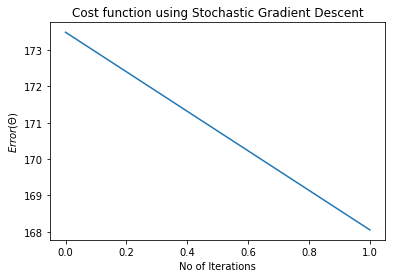

No of iterations: 3
Training error: [138257.33632956]
No of iterations: 3
Training error: [187.7841891]
No of iterations: 6
Training error: [84.24676863]
No of iterations: 4
Training error: [788.97259822]
No of iterations: 4
Training error: [3815.36064308]
No of iterations: 7
Training error: [102.16170688]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 9 polynomial:
 [[ -6.53972249]
 [ -2.73260966]
 [ -2.16936295]
 [ -7.49817606]
 [ -7.07576099]
 [ -2.00329345]
 [ -6.64657537]
 [ -7.13284438]
 [ -6.56705345]
 [ -1.07127164]
 [ -4.75248965]
 [ -7.19455615]
 [ -7.61583198]
 [ -7.59738932]
 [ -1.41264017]
 [ -4.59671986]
 [ -6.06333812]
 [ -7.80315647]
 [ -8.2521031 ]
 [ -7.71719322]
 [ -0.35073791]
 [ -2.80349837]
 [ -5.55152231]
 [ -7.87312448]
 [ -8.25786414]
 [ -8.36587433]
 [ -8.08356242]
 [  0.15561078]
 [ -2.69353225]
 [ -4.74839175]
 [ -6.49924173]
 [ -7.7705207 ]
 [ -9.04400064]
 [ -8.54185922]
 [ -8.27785263]
 [ -0.10565309]
 [ -1.36354556]
 [ -3.4679825 

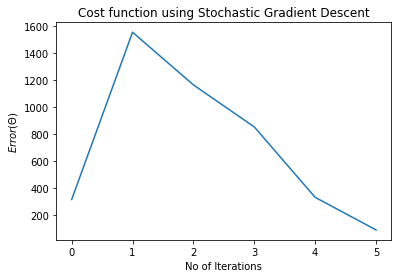

No of iterations: 3
Training error: [6.75718114e+09]
No of iterations: 3
Training error: [1.52123351e+08]
No of iterations: 3
Training error: [569.75336618]
No of iterations: 3
Training error: [425.30408207]
No of iterations: 3
Training error: [420.85708423]
No of iterations: 4
Training error: [29.69524653]
The final weights using Stochastic Gradient Descent, L1 Reg and degree 10 polynomial:
 [[ 0.41146387]
 [-0.50665258]
 [-0.21284065]
 [-0.15878321]
 [ 0.55099922]
 [-0.0836547 ]
 [-0.26378236]
 [-0.17968536]
 [-0.33723853]
 [-0.52006621]
 [-0.13697162]
 [ 0.25985671]
 [-0.52413264]
 [ 0.17334061]
 [-0.17275789]
 [-0.2660518 ]
 [ 0.01073161]
 [-0.76060842]
 [ 0.07426201]
 [-0.53709486]
 [-0.25341888]
 [ 0.02921641]
 [-0.44451254]
 [-0.4561599 ]
 [-0.56093931]
 [-0.69541806]
 [ 0.00838321]
 [-0.5327261 ]
 [-0.15061674]
 [-0.80896138]
 [ 0.06553997]
 [-0.34136629]
 [-0.33643144]
 [-0.42498086]
 [-0.79745363]
 [-0.75082285]
 [-0.80246187]
 [-0.24423887]
 [-0.17223952]
 [-0.54556167]
 [-0

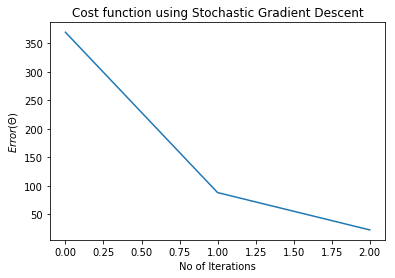


Training errors with SGD with L1 regularization : 

[array([0.70862752]), array([0.55889338]), array([20.50913295]), array([4.94215777]), array([1394.73767057]), array([87.6182075]), array([9.83698741]), array([421.9570699]), array([102.16170688]), array([29.69524653])]

Testing errors with SGD with L1 regularization : 

[array([0.53589074]), array([0.46258128]), array([20.30514558]), array([5.73276458]), array([95.0718502]), array([71.68571589]), array([2.21997501]), array([93.00771501]), array([38982.85837327]), array([132.49579766])]
[0.30000000000000004, 0.4, 0.30000000000000004, 0.2, 0.30000000000000004, 0.4, 0.2, 0.6000000000000001, 0.2, 0.7000000000000001]


In [22]:
# Stochastic Gradient descent with L1 regularization

import random

global learnRate
learnRate = 0.1
flag = 0
global l
l = 0

def reg_testaccuracy(w,y,x_test):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x_test @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    regularizedCost= cost + l/(n)*sum(abs(w))
    return regularizedCost

def SL1CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    i=np.random.choice(np.arange(len(y)))
    x1=x[i]
    x1=x1.reshape(1,x.shape[1])
    y_pred = x1 @ w
    error = (y_pred - y[i])**2
    x1=x1.reshape(x.shape[1],1)
    y1=y_pred-y[i]
    grad = (x1 @ y1) + (l/n)
    return grad

def SL1gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        grad = SL1CostFunction(w,x,y)
        cost = reg_testaccuracy(w,y,x)
        w = w - (learnRate * grad)
        it=it+1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-6)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)

        
degree_errors_train = []
degree_errors_test = []
min_error_validation = 10000000000000000000
best_lambda = []
for i in range(1,11):
    final_lambda=0.5
    min_error = 1000000000000000
    # use validation data to find best lambda
    for _ in range(1,6):
        l = random.randrange(2,9)
        l = 0.1*l
        data_temp = transform_dataset(df,i)
        df_new = norms(data_temp)
        df_new = df_new.drop(columns=['Const'])
        train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                           [int(.7*len(df_new)), int(.9*len(df_new))])
        y_train = train.iloc[:,2]
        x_train = np.array(train.drop(columns=['y']))
        y_test = test.iloc[:,2]
        x_test = np.array(test.drop(columns=['y']))
        y_validate = validate.iloc[:,2]
        x_validate = np.array(validate.drop(columns=['y']))
        initial_w = np.random.rand(x_train.shape[1],1)
        train_err,w,Error_history = SL1gradientDescent(initial_w,x_train,y_train,10000)
        cur_error = reg_testaccuracy(w,y_validate,x_validate)
        if(cur_error<min_error):
            min_error = cur_error
            final_lambda = l
    l = final_lambda
    best_lambda.append(final_lambda)
    min_error_validation = min(min_error,min_error_validation)
    data_temp = transform_dataset(df,i)
    df_new = norms(data_temp)
    df_new = df_new.drop(columns=['Const'])
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,2]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,2]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,2]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = SL1gradientDescent(initial_w,x_train,y_train,10000)
    cur_error = reg_testaccuracy(w,y_validate,x_validate)
    print(f"The final weights using Stochastic Gradient Descent, L1 Reg and degree {i} polynomial:\n",w)
    cur_error = reg_testaccuracy(w,y_test,x_test)
    degree_errors_train.append(train_err)
    degree_errors_test.append(cur_error)
    print("Testing Error:",reg_testaccuracy(w,y_test,x_test))
    plt.plot(Error_history)
    plt.xlabel("No of Iterations")
    plt.ylabel("$Error(\Theta)$")
    plt.title("Cost function using Stochastic Gradient Descent")
    plt.show()

print("\nTraining errors with SGD with L1 regularization : \n")
print(degree_errors_train)
print("\nTesting errors with SGD with L1 regularization : \n")
print(degree_errors_test)
print(best_lambda)

In [23]:
finalerr = pd.DataFrame(degree_errors_train,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of training errors of all degrees is:",mean[0]) 
print("Variance of training errors of all degrees is:",var[0])
print("Minimum training error of all degrees is:",minx[0])

finalerr = pd.DataFrame(degree_errors_test,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of testing errors of all degrees is:",mean[0]) 
print("Variance of testing errors of all degrees is:",var[0])
print("Minimum testing error of all degrees is:",minx[0])
print("Minimum validation error of all degrees is:",min_error_validation)

Mean of training errors of all degrees is: 207.27257004210355
Variance of training errors of all degrees is: 190362.23980316607
Minimum training error of all degrees is: 0.5588933782364635
Mean of testing errors of all degrees is: 3940.43758092176
Variance of testing errors of all degrees is: 151603733.03580746
Minimum testing error of all degrees is: 0.46258128313719604
Minimum validation error of all degrees is: [0.49717567]


Stochastic Gradient descent with L2 regularization

No of iterations: 4
Training error: [0.45652683]
No of iterations: 3
Training error: [0.44977954]
No of iterations: 3
Training error: [0.80578665]
No of iterations: 3
Training error: [0.46322988]
No of iterations: 6
Training error: [0.61919757]
No of iterations: 5
Training error: [0.5502813]
No of iterations: 4
Training error: [0.59511199]
No of iterations: 3
Training error: [0.45349744]
No of iterations: 4
Training error: [0.64834872]
No of iterations: 4
Training error: [0.48904383]
No of iterations: 4
Training error: [1.02575705]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 1 polynomial:
 [[0.86214303]
 [0.98946108]]
Testing Error: [0.9052893]


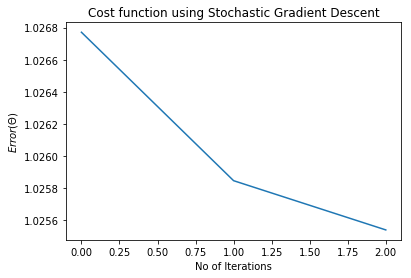

No of iterations: 3
Training error: [1.94744058]
No of iterations: 9
Training error: [1.24745062]
No of iterations: 8
Training error: [2.61140529]
No of iterations: 8
Training error: [2.07821573]
No of iterations: 10
Training error: [2.43995713]
No of iterations: 24
Training error: [1.76779599]
No of iterations: 5
Training error: [2.27085471]
No of iterations: 4
Training error: [1.71886924]
No of iterations: 3
Training error: [0.66685087]
No of iterations: 3
Training error: [3.28638991]
No of iterations: 3
Training error: [1.40200292]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 2 polynomial:
 [[0.72475082]
 [0.02188957]
 [0.94933713]
 [0.32466383]
 [0.17246584]]
Testing Error: [1.27707834]


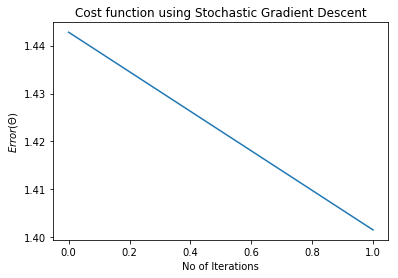

No of iterations: 9
Training error: [6.56832477]
No of iterations: 50
Training error: [2.12500076]
No of iterations: 62
Training error: [1.95546035]
No of iterations: 20
Training error: [10.46060522]
No of iterations: 6
Training error: [9.88539452]
No of iterations: 16
Training error: [3.93785742]
No of iterations: 5
Training error: [4.65090412]
No of iterations: 7
Training error: [7.07064756]
No of iterations: 9
Training error: [3.04439405]
No of iterations: 9
Training error: [2.05170373]
No of iterations: 5
Training error: [7.20758243]
No of iterations: 8
Training error: [5.54115884]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 3 polynomial:
 [[0.96952716]
 [0.96680237]
 [0.55340668]
 [0.71884615]
 [0.44669979]
 [0.40102043]
 [0.04627637]
 [0.08904138]
 [0.29307421]]
Testing Error: [5.30550335]


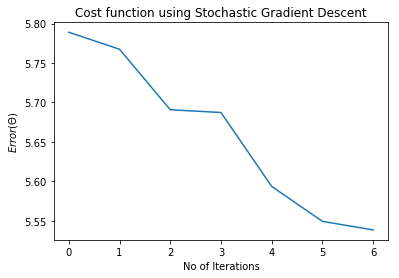

No of iterations: 7
Training error: [10.83869757]
No of iterations: 10
Training error: [7.54217014]
No of iterations: 33
Training error: [9.07062266]
No of iterations: 24
Training error: [10.81914472]
No of iterations: 50
Training error: [8.46417496]
No of iterations: 65
Training error: [6.67229053]
No of iterations: 25
Training error: [12.95208916]
No of iterations: 34
Training error: [7.16476042]
No of iterations: 14
Training error: [16.8201325]
No of iterations: 50
Training error: [6.68026968]
No of iterations: 78
Training error: [3.82858516]
No of iterations: 39
Training error: [5.94068277]
No of iterations: 16
Training error: [11.33860187]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 4 polynomial:
 [[ 0.44793572]
 [ 0.84750935]
 [ 0.22614383]
 [ 0.70677808]
 [ 0.43802728]
 [ 0.66792074]
 [ 0.10756354]
 [ 0.28763171]
 [ 0.81355259]
 [ 0.32454828]
 [ 0.66141623]
 [ 0.3660443 ]
 [-0.03887806]
 [ 0.25415959]]
Testing Error: [10.7343004]


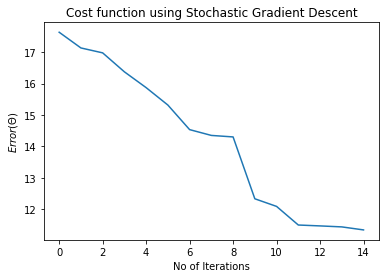

No of iterations: 20
Training error: [25.28286562]
No of iterations: 15
Training error: [23.53092945]
No of iterations: 15
Training error: [26.48880059]
No of iterations: 38
Training error: [13.93487785]
No of iterations: 27
Training error: [17.45702017]
No of iterations: 8
Training error: [20.68851784]
No of iterations: 11
Training error: [17.53287544]
No of iterations: 16
Training error: [9.63722631]
No of iterations: 35
Training error: [10.73345699]
No of iterations: 8
Training error: [20.46301786]
No of iterations: 9
Training error: [25.11603023]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 5 polynomial:
 [[ 0.86504346]
 [ 0.27648423]
 [ 0.43782834]
 [ 0.74702303]
 [ 0.39021444]
 [ 0.9643116 ]
 [ 0.03980684]
 [ 0.91886168]
 [ 0.85126821]
 [ 0.21443448]
 [ 0.62279217]
 [-0.00393049]
 [ 0.03235199]
 [ 0.65542533]
 [ 0.43527852]
 [ 0.05288819]
 [ 0.83601613]
 [ 0.06601609]
 [ 0.0833087 ]
 [ 0.43744298]]
Testing Error: [24.31255186]


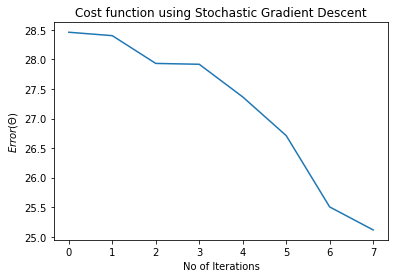

No of iterations: 27
Training error: [11.89017593]
No of iterations: 8
Training error: [32.81466444]
No of iterations: 15
Training error: [41.57100954]
No of iterations: 30
Training error: [12.91013304]
No of iterations: 15
Training error: [20.65765921]
No of iterations: 40
Training error: [23.00465936]
No of iterations: 13
Training error: [67.37009583]
No of iterations: 50
Training error: [7.78370461]
No of iterations: 67
Training error: [5.18989255]
No of iterations: 9
Training error: [38.60018747]
No of iterations: 10
Training error: [49.59055185]
No of iterations: 50
Training error: [18.39462162]
No of iterations: 52
Training error: [17.69638637]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 6 polynomial:
 [[ 0.40900097]
 [ 0.32229338]
 [ 0.18690834]
 [-0.09929318]
 [-0.07916337]
 [ 0.3405326 ]
 [ 0.70718412]
 [-0.09963289]
 [ 0.66236014]
 [ 0.69686187]
 [ 0.24912432]
 [ 0.18032833]
 [-0.21824724]
 [-0.0918177 ]
 [ 0.5954034 ]
 [-0.14158849]
 [ 0.10887793]


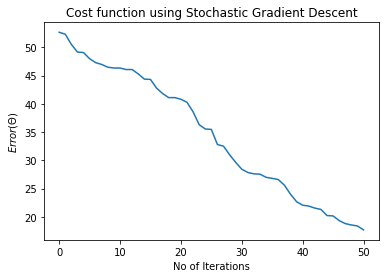

No of iterations: 3
Training error: [90.18420833]
No of iterations: 22
Training error: [35.5184319]
No of iterations: 5
Training error: [58.7675997]
No of iterations: 27
Training error: [25.02143033]
No of iterations: 40
Training error: [17.13760419]
No of iterations: 50
Training error: [22.30648156]
No of iterations: 83
Training error: [7.88728817]
No of iterations: 13
Training error: [86.21651152]
No of iterations: 32
Training error: [37.72893406]
No of iterations: 39
Training error: [8.62943665]
No of iterations: 19
Training error: [63.80567301]
No of iterations: 50
Training error: [10.38296225]
No of iterations: 66
Training error: [2.88564996]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 7 polynomial:
 [[ 0.58820902]
 [-0.10190132]
 [ 0.1706218 ]
 [ 0.23920451]
 [ 0.25959335]
 [-0.24291785]
 [ 0.13079533]
 [-0.0327061 ]
 [ 0.08352218]
 [-0.07781897]
 [-0.16315319]
 [-0.18633508]
 [ 0.36030458]
 [-0.13688105]
 [ 0.30884041]
 [ 0.05748225]
 [-0.37984616]
 [-

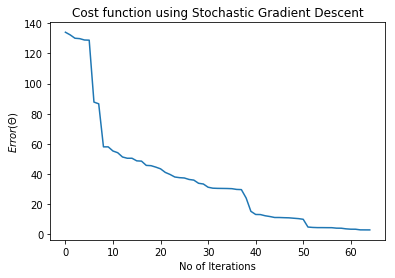

No of iterations: 6
Training error: [81.68242969]
No of iterations: 42
Training error: [5.26580211]
No of iterations: 24
Training error: [17.4614983]
No of iterations: 13
Training error: [14.88778459]
No of iterations: 23
Training error: [66.12992841]
No of iterations: 36
Training error: [33.45528404]
No of iterations: 21
Training error: [22.03679261]
No of iterations: 29
Training error: [53.7323188]
No of iterations: 37
Training error: [2.46818566]
No of iterations: 28
Training error: [8.2311971]
No of iterations: 14
Training error: [92.6039071]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 8 polynomial:
 [[-0.10317836]
 [ 0.86683723]
 [ 0.6216079 ]
 [ 0.37292426]
 [ 0.54085696]
 [-0.03658264]
 [ 0.39043694]
 [ 0.35295702]
 [-0.06404014]
 [ 0.34144284]
 [ 0.25402924]
 [-0.12212889]
 [ 0.86032319]
 [-0.10042177]
 [ 0.00683493]
 [-0.01449168]
 [ 0.47255955]
 [ 0.34165575]
 [ 0.77952517]
 [ 0.24626821]
 [ 0.13697682]
 [ 0.45375005]
 [ 0.19038305]
 [ 0.27737215]
 

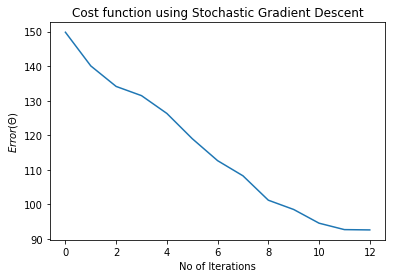

No of iterations: 38
Training error: [6.536749]
No of iterations: 10
Training error: [146.2660447]
No of iterations: 34
Training error: [49.32648556]
No of iterations: 25
Training error: [89.68768858]
No of iterations: 41
Training error: [0.73384173]
No of iterations: 49
Training error: [3.35650706]
No of iterations: 18
Training error: [10.87428871]
No of iterations: 22
Training error: [4.38530351]
No of iterations: 50
Training error: [18.12490343]
No of iterations: 52
Training error: [17.95252647]
No of iterations: 11
Training error: [58.19393751]
No of iterations: 31
Training error: [84.87822752]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 9 polynomial:
 [[ 0.32506663]
 [-0.22120407]
 [ 0.15801796]
 [ 0.55739928]
 [-0.22907831]
 [ 0.29050416]
 [-0.03806061]
 [ 0.04564105]
 [ 0.37837459]
 [ 0.4330352 ]
 [ 0.36705463]
 [ 0.09268155]
 [ 0.47843995]
 [-0.02519306]
 [ 0.82002939]
 [ 0.23789628]
 [-0.27154214]
 [ 0.02998748]
 [ 0.61150601]
 [-0.22226168]
 [ 0.673

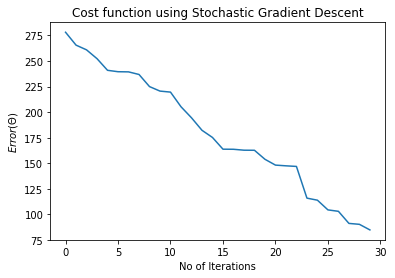

No of iterations: 7
Training error: [224.56423152]
No of iterations: 16
Training error: [2.21168149]
No of iterations: 19
Training error: [1.16526052]
No of iterations: 30
Training error: [38.36270706]
No of iterations: 50
Training error: [18.86839211]
No of iterations: 56
Training error: [12.02760399]
No of iterations: 11
Training error: [198.18822782]
No of iterations: 30
Training error: [11.97997051]
No of iterations: 14
Training error: [25.33237552]
No of iterations: 33
Training error: [23.42433894]
No of iterations: 14
Training error: [308.31195186]
No of iterations: 25
Training error: [39.94871298]
The final weights using Stochastic Gradient Descent, L2 Reg and degree 10 polynomial:
 [[ 0.10739915]
 [ 0.6708517 ]
 [ 0.13100103]
 [ 0.30226   ]
 [ 0.12507377]
 [ 0.62954555]
 [ 0.08736809]
 [ 0.13735741]
 [ 0.17752448]
 [ 0.53476065]
 [ 0.11091894]
 [-0.30351188]
 [-0.19010824]
 [-0.19658637]
 [-0.09628801]
 [ 0.00480356]
 [ 0.45598642]
 [-0.16551315]
 [ 0.31960184]
 [ 0.26984774]
 

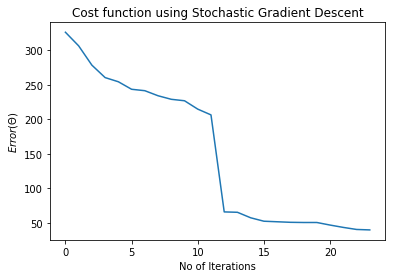


Training errors with SGD with L2 regularization : 

[array([1.02575705]), array([1.40200292]), array([5.54115884]), array([11.33860187]), array([25.11603023]), array([17.69638637]), array([2.88564996]), array([92.6039071]), array([84.87822752]), array([39.94871298])]

Testing errors with SGD with L2 regularization : 

[array([0.9052893]), array([1.27707834]), array([5.30550335]), array([10.7343004]), array([24.31255186]), array([15.79192128]), array([2.67419731]), array([82.63464164]), array([67.80190465]), array([27.65566499])]
[0.4, 0.5, 0.5, 0.7000000000000001, 0.2, 0.2, 0.8, 0.4, 0.7000000000000001, 0.4]


In [26]:
# Stochastic Gradient descent with L2 regularization

import random

global learnRate
learnRate = 0.001
flag = 0
global l
l = 0

def reg2_testaccuracy(w,y,x_test):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x_test @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    regularizedCost= cost + (l/(2*n)*sum(w**2))
    return regularizedCost

def SL2CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    i=np.random.choice(np.arange(len(y)))
    x1=x[i]
    x1=x1.reshape(1,x.shape[1])
    y_pred = x1 @ w
    error = (y_pred - y[i])**2
    x1=x1.reshape(x.shape[1],1)
    y1=y_pred-y[i]
    grad = (x1 @ y1) + (l/n)*w[0:]
    return grad

def SL2gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        grad = SL2CostFunction(w,x,y)
        cost = reg2_testaccuracy(w,y,x)
        w = w - (learnRate * grad)
        it=it+1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-6)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)

        
degree_errors_train = []
degree_errors_test = []
min_error_validation = 1000000000000000000
best_lambda = []

for i in range(1,11):
    final_lambda=0.5
    min_error = 1000000000000000
    # use validation data to find best lambda
    for _ in range(1,11):
        l = random.randrange(2,9)
        l = 0.1*l
        data_temp = transform_dataset(df,i)
        df_new = norms(data_temp)
        df_new = df_new.drop(columns=['Const'])
        train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                           [int(.7*len(df_new)), int(.9*len(df_new))])
        y_train = train.iloc[:,2]
        x_train = np.array(train.drop(columns=['y']))
        y_test = test.iloc[:,2]
        x_test = np.array(test.drop(columns=['y']))
        y_validate = validate.iloc[:,2]
        x_validate = np.array(validate.drop(columns=['y']))
        initial_w = np.random.rand(x_train.shape[1],1)
        train_err,w,Error_history = SL2gradientDescent(initial_w,x_train,y_train,10000)
        cur_error = reg2_testaccuracy(w,y_validate,x_validate)
        if(cur_error<min_error):
            min_error = cur_error
            final_lambda = l
    l = final_lambda
    best_lambda.append(final_lambda)
    min_error_validation = min(min_error,min_error_validation)
    data_temp = transform_dataset(df,i)
    #print(data_temp)
    df_new = norms(data_temp)
    df_new = df_new.drop(columns=['Const'])
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,2]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,2]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,2]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = SL2gradientDescent(initial_w,x_train,y_train,10000)
    cur_error = reg2_testaccuracy(w,y_validate,x_validate)
    print(f"The final weights using Stochastic Gradient Descent, L2 Reg and degree {i} polynomial:\n",w)
    cur_error = reg2_testaccuracy(w,y_test,x_test)
    degree_errors_train.append(train_err)
    degree_errors_test.append(cur_error)
    print("Testing Error:",reg2_testaccuracy(w,y_test,x_test))
    plt.plot(Error_history)
    plt.xlabel("No of Iterations")
    plt.ylabel("$Error(\Theta)$")
    plt.title("Cost function using Stochastic Gradient Descent")
    plt.show()

print("\nTraining errors with SGD with L2 regularization : \n")
print(degree_errors_train)
print("\nTesting errors with SGD with L2 regularization : \n")
print(degree_errors_test)
print(best_lambda)

In [27]:
finalerr = pd.DataFrame(degree_errors_train,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of training errors of all degrees is:",mean[0]) 
print("Variance of training errors of all degrees is:",var[0])
print("Minimum training error of all degrees is:",minx[0])

finalerr = pd.DataFrame(degree_errors_test,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of testing errors of all degrees is:",mean[0]) 
print("Variance of testing errors of all degrees is:",var[0])
print("Minimum testing error of all degrees is:",minx[0])
print("Minimum validation error of all degrees is:",min_error_validation)

Mean of training errors of all degrees is: 28.243643484362895
Variance of training errors of all degrees is: 1168.1392196413972
Minimum training error of all degrees is: 1.0257570520285626
Mean of testing errors of all degrees is: 23.90930531159998
Variance of testing errors of all degrees is: 829.7032898763734
Minimum testing error of all degrees is: 0.9052893032358355
Minimum validation error of all degrees is: [0.44016702]


Surface Plots for Predictions

   Nothing  age     bmi      charges
0        1   19  27.900  16884.92400
1        1   18  33.770   1725.55230
2        1   28  33.000   4449.46200
3        1   33  22.705  21984.47061
4        1   32  28.880   3866.85520
No of iterations: 50
Training error: [0.70979968]
No of iterations: 100
Training error: [0.53821619]
No of iterations: 150
Training error: [0.47954499]
No of iterations: 200
Training error: [0.45938002]
No of iterations: 250
Training error: [0.45241395]
No of iterations: 300
Training error: [0.44999532]
No of iterations: 350
Training error: [0.4491514]
No of iterations: 400
Training error: [0.44885552]
No of iterations: 450
Training error: [0.44875131]
No of iterations: 500
Training error: [0.44871444]
No of iterations: 550
Training error: [0.44870134]
No of iterations: 571
Training error: [0.44869879]


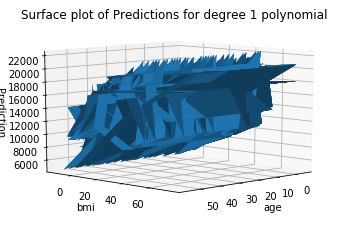

Testing Error: [0.39537201]
No of iterations: 50
Training error: [0.61744133]
No of iterations: 100
Training error: [0.49069364]
No of iterations: 150
Training error: [0.46363247]
No of iterations: 200
Training error: [0.45447176]
No of iterations: 250
Training error: [0.45112386]
No of iterations: 300
Training error: [0.4498744]
No of iterations: 350
Training error: [0.44939264]
No of iterations: 400
Training error: [0.44919252]
No of iterations: 450
Training error: [0.44909605]
No of iterations: 500
Training error: [0.44903801]
No of iterations: 550
Training error: [0.44899449]
No of iterations: 600
Training error: [0.44895672]
No of iterations: 650
Training error: [0.44892149]
No of iterations: 700
Training error: [0.4488876]
No of iterations: 750
Training error: [0.44885461]
No of iterations: 800
Training error: [0.44882234]
No of iterations: 850
Training error: [0.44879073]
No of iterations: 900
Training error: [0.44875974]
No of iterations: 950
Training error: [0.44872936]
No of 

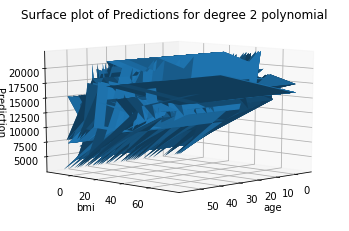

Testing Error: [0.40021891]
No of iterations: 50
Training error: [0.49951498]
No of iterations: 100
Training error: [0.46203987]
No of iterations: 150
Training error: [0.45413165]
No of iterations: 200
Training error: [0.45118125]
No of iterations: 250
Training error: [0.45002071]
No of iterations: 300
Training error: [0.44951857]
No of iterations: 350
Training error: [0.44926126]
No of iterations: 400
Training error: [0.44909711]
No of iterations: 450
Training error: [0.44897038]
No of iterations: 500
Training error: [0.44886048]
No of iterations: 550
Training error: [0.44875969]
No of iterations: 600
Training error: [0.44866503]
No of iterations: 650
Training error: [0.44857526]
No of iterations: 700
Training error: [0.44848978]
No of iterations: 750
Training error: [0.44840826]
No of iterations: 800
Training error: [0.44833044]
No of iterations: 850
Training error: [0.44825612]
No of iterations: 900
Training error: [0.44818511]
No of iterations: 950
Training error: [0.44811724]
No o

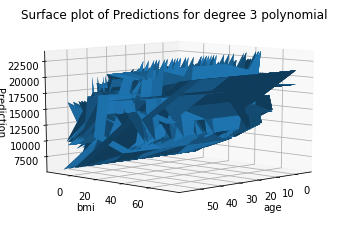

Testing Error: [0.39606182]
No of iterations: 50
Training error: [0.54138333]
No of iterations: 100
Training error: [0.48611498]
No of iterations: 150
Training error: [0.46558222]
No of iterations: 200
Training error: [0.45732399]
No of iterations: 250
Training error: [0.45367377]
No of iterations: 300
Training error: [0.45180999]
No of iterations: 350
Training error: [0.45068348]
No of iterations: 400
Training error: [0.44989671]
No of iterations: 450
Training error: [0.44929297]
No of iterations: 500
Training error: [0.44880553]
No of iterations: 550
Training error: [0.44840213]
No of iterations: 600
Training error: [0.4480644]
No of iterations: 650
Training error: [0.44778006]
No of iterations: 700
Training error: [0.44754]
No of iterations: 750
Training error: [0.44733698]
No of iterations: 800
Training error: [0.44716507]
No of iterations: 850
Training error: [0.44701935]
No of iterations: 900
Training error: [0.44689569]
No of iterations: 950
Training error: [0.44679065]
No of it

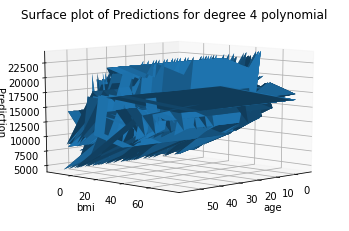

Testing Error: [0.39717207]
No of iterations: 50
Training error: [0.58357775]
No of iterations: 100
Training error: [0.53695532]
No of iterations: 150
Training error: [0.51002496]
No of iterations: 200
Training error: [0.49260321]
No of iterations: 250
Training error: [0.48062092]
No of iterations: 300
Training error: [0.47206831]
No of iterations: 350
Training error: [0.4658294]
No of iterations: 400
Training error: [0.46121806]
No of iterations: 450
Training error: [0.45777997]
No of iterations: 500
Training error: [0.4551999]
No of iterations: 550
Training error: [0.45325294]
No of iterations: 600
Training error: [0.4517761]
No of iterations: 650
Training error: [0.45065008]
No of iterations: 700
Training error: [0.44978701]
No of iterations: 750
Training error: [0.44912187]
No of iterations: 800
Training error: [0.44860635]
No of iterations: 850
Training error: [0.44820439]
No of iterations: 900
Training error: [0.447889]
No of iterations: 950
Training error: [0.44763992]
No of ite

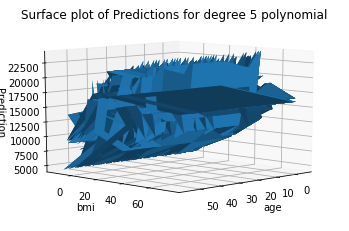

Testing Error: [0.3958494]
No of iterations: 50
Training error: [0.52385487]
No of iterations: 100
Training error: [0.48500725]
No of iterations: 150
Training error: [0.46659949]
No of iterations: 200
Training error: [0.45729392]
No of iterations: 250
Training error: [0.45241072]
No of iterations: 300
Training error: [0.44977223]
No of iterations: 350
Training error: [0.44831478]
No of iterations: 400
Training error: [0.44749611]
No of iterations: 450
Training error: [0.44703001]
No of iterations: 500
Training error: [0.44676132]
No of iterations: 550
Training error: [0.44660432]
No of iterations: 600
Training error: [0.44651096]
No of iterations: 650
Training error: [0.44645408]
No of iterations: 700
Training error: [0.44641823]
No of iterations: 750
Training error: [0.44639453]
No of iterations: 800
Training error: [0.44637792]
No of iterations: 850
Training error: [0.44636545]
No of iterations: 900
Training error: [0.44635543]
No of iterations: 950
Training error: [0.44634688]
No of

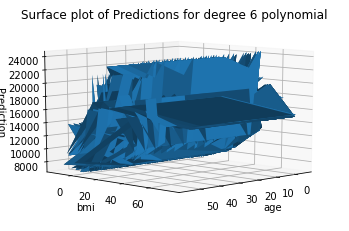

Testing Error: [0.39835363]
No of iterations: 50
Training error: [0.4849446]
No of iterations: 100
Training error: [0.46414892]
No of iterations: 150
Training error: [0.45465659]
No of iterations: 200
Training error: [0.45012239]
No of iterations: 250
Training error: [0.44786952]
No of iterations: 300
Training error: [0.44671135]
No of iterations: 350
Training error: [0.44609859]
No of iterations: 400
Training error: [0.44576631]
No of iterations: 450
Training error: [0.44558193]
No of iterations: 500
Training error: [0.44547711]
No of iterations: 550
Training error: [0.44541574]
No of iterations: 600
Training error: [0.44537838]
No of iterations: 650
Training error: [0.44535445]
No of iterations: 700
Training error: [0.44533809]
No of iterations: 750
Training error: [0.44532607]
No of iterations: 800
Training error: [0.44531656]
No of iterations: 850
Training error: [0.44530854]
No of iterations: 900
Training error: [0.44530143]
No of iterations: 950
Training error: [0.4452949]
No of 

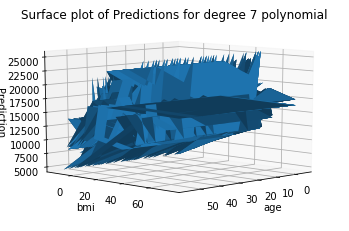

Testing Error: [0.39874564]
No of iterations: 50
Training error: [0.46522217]
No of iterations: 100
Training error: [0.4568361]
No of iterations: 150
Training error: [0.45351731]
No of iterations: 200
Training error: [0.45204458]
No of iterations: 250
Training error: [0.45127508]
No of iterations: 300
Training error: [0.45079039]
No of iterations: 350
Training error: [0.45043225]
No of iterations: 400
Training error: [0.45013825]
No of iterations: 450
Training error: [0.44988229]
No of iterations: 500
Training error: [0.44965257]
No of iterations: 550
Training error: [0.44944312]
No of iterations: 600
Training error: [0.44925047]
No of iterations: 650
Training error: [0.44907234]
No of iterations: 700
Training error: [0.44890703]
No of iterations: 750
Training error: [0.44875319]
No of iterations: 800
Training error: [0.44860967]
No of iterations: 850
Training error: [0.44847549]
No of iterations: 900
Training error: [0.44834978]
No of iterations: 950
Training error: [0.44823176]
No of

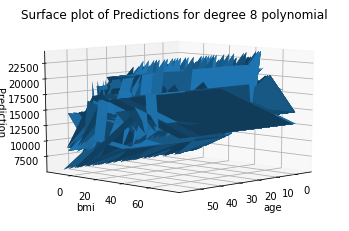

Testing Error: [0.40387746]
No of iterations: 50
Training error: [0.63286928]
No of iterations: 100
Training error: [0.51606832]
No of iterations: 150
Training error: [0.47937201]
No of iterations: 200
Training error: [0.46574806]
No of iterations: 250
Training error: [0.45971878]
No of iterations: 300
Training error: [0.45648887]
No of iterations: 350
Training error: [0.45442428]
No of iterations: 400
Training error: [0.45292533]
No of iterations: 450
Training error: [0.45175328]
No of iterations: 500
Training error: [0.45080145]
No of iterations: 550
Training error: [0.45001412]
No of iterations: 600
Training error: [0.4493569]
No of iterations: 650
Training error: [0.44880551]
No of iterations: 700
Training error: [0.44834137]
No of iterations: 750
Training error: [0.4479496]
No of iterations: 800
Training error: [0.44761803]
No of iterations: 850
Training error: [0.44733662]
No of iterations: 900
Training error: [0.44709705]
No of iterations: 950
Training error: [0.44689241]
No of 

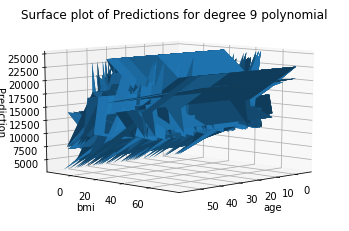

Testing Error: [0.40177145]
No of iterations: 50
Training error: [0.61918233]
No of iterations: 100
Training error: [0.51372638]
No of iterations: 150
Training error: [0.47813036]
No of iterations: 200
Training error: [0.46509022]
No of iterations: 250
Training error: [0.45992877]
No of iterations: 300
Training error: [0.4576337]
No of iterations: 350
Training error: [0.45642233]
No of iterations: 400
Training error: [0.45564505]
No of iterations: 450
Training error: [0.45505923]
No of iterations: 500
Training error: [0.45457086]
No of iterations: 550
Training error: [0.45414121]
No of iterations: 600
Training error: [0.45375262]
No of iterations: 650
Training error: [0.45339591]
No of iterations: 700
Training error: [0.45306557]
No of iterations: 750
Training error: [0.45275783]
No of iterations: 800
Training error: [0.45246991]
No of iterations: 850
Training error: [0.45219964]
No of iterations: 900
Training error: [0.45194526]
No of iterations: 950
Training error: [0.45170533]
No of

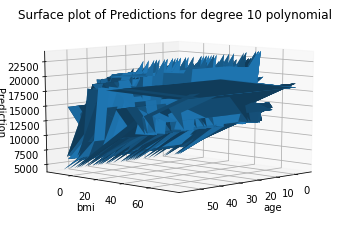

Testing Error: [0.39642296]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('insurance.txt', sep=",",header=None)
df.columns = ['age','bmi','children','charges']
df.insert(0,'Nothing',1)
df = df.drop(columns=['children'])

print(df.head())
global learnRate
learnRate = 0.01
flag = 0

def CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    grad = 1/n * (x.transpose() @ (y_pred - y))[0:]
    return cost, grad

def gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it+=1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)


for i in range(1,11):
    y_start = df.iloc[:,3]
    x_start = np.array(df.drop(columns=['charges']))
    data_temp = transform_dataset(df,i)
    df_new = norms(data_temp)
    df_new['Const'] = df_new['Const'].fillna(1)
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,3]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,3]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,3]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = gradientDescent(initial_w,x_train,y_train,1000)
    x = np.array(x_test[:,1])
    y = np.array(x_test[:,2])
    x = (x*x_start.std()) + x_start.mean()
    y = (y*x_start.std()) + x_start.mean()
    X,Y = np.meshgrid(x,y) # Construct a multi-dimensional “meshgrid” using indexing notation.
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(10,45)
    mycmap = plt.get_cmap('gist_earth')
    predictions = x_test @ w # get preds
    predictions = predictions*y_start.std() + y_start.mean() # de norm preds for visualization
    predictions = np.array(predictions) 
    ax.plot_surface(X,Y,predictions)
    ax.set_title(f"Surface plot of Predictions for degree {i} polynomial")
    ax.set_xlabel('age')
    ax.set_ylabel('bmi')
    ax.set_zlabel('Prediction')
    plt.show()
    #print(f"The final weights using Gradient Descent and degree {i} polynomial:\n",w)
    cur_error = testaccuracy(w,y_test,x_test)
    print("Testing Error:",testaccuracy(w,y_test,x_test))
    

Surface Plot of Predictions

No of iterations: 50
Training error: [0.50184782]
No of iterations: 100
Training error: [0.46694326]
No of iterations: 150
Training error: [0.45499122]
No of iterations: 200
Training error: [0.45087784]
No of iterations: 250
Training error: [0.44945507]
No of iterations: 300
Training error: [0.44896051]
No of iterations: 350
Training error: [0.44878777]
No of iterations: 400
Training error: [0.44872716]
No of iterations: 450
Training error: [0.4487058]
No of iterations: 494
Training error: [0.44869879]


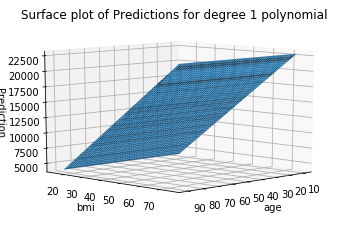

No of iterations: 50
Training error: [0.5616546]
No of iterations: 100
Training error: [0.47776094]
No of iterations: 150
Training error: [0.45762015]
No of iterations: 200
Training error: [0.45086741]
No of iterations: 250
Training error: [0.44845192]
No of iterations: 300
Training error: [0.44757428]
No of iterations: 350
Training error: [0.44725338]
No of iterations: 400
Training error: [0.44713544]
No of iterations: 450
Training error: [0.4470917]
No of iterations: 500
Training error: [0.44707514]
No of iterations: 540
Training error: [0.44706945]


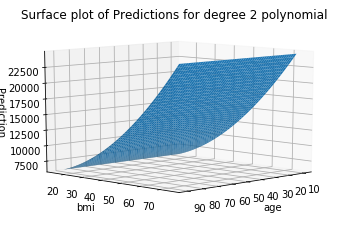

No of iterations: 50
Training error: [0.46292849]
No of iterations: 100
Training error: [0.44859257]
No of iterations: 150
Training error: [0.44838834]
No of iterations: 200
Training error: [0.44831041]
No of iterations: 250
Training error: [0.44824406]
No of iterations: 300
Training error: [0.44818242]
No of iterations: 350
Training error: [0.4481244]
No of iterations: 400
Training error: [0.44806959]
No of iterations: 450
Training error: [0.44801773]
No of iterations: 500
Training error: [0.44796862]
No of iterations: 550
Training error: [0.44792208]
No of iterations: 600
Training error: [0.44787795]
No of iterations: 650
Training error: [0.44783609]
No of iterations: 700
Training error: [0.44779637]
No of iterations: 750
Training error: [0.44775866]
No of iterations: 800
Training error: [0.44772285]
No of iterations: 850
Training error: [0.44768882]
No of iterations: 900
Training error: [0.44765649]
No of iterations: 950
Training error: [0.44762574]
No of iterations: 1000
Training e

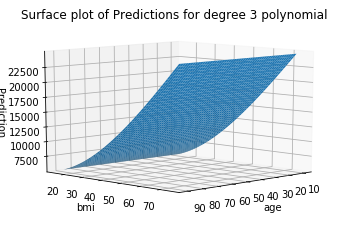

No of iterations: 50
Training error: [0.47306498]
No of iterations: 100
Training error: [0.46814463]
No of iterations: 150
Training error: [0.46461729]
No of iterations: 200
Training error: [0.46166881]
No of iterations: 250
Training error: [0.459201]
No of iterations: 300
Training error: [0.45713438]
No of iterations: 350
Training error: [0.45540327]
No of iterations: 400
Training error: [0.45395302]
No of iterations: 450
Training error: [0.45273797]
No of iterations: 500
Training error: [0.45171991]
No of iterations: 550
Training error: [0.45086686]
No of iterations: 600
Training error: [0.45015203]
No of iterations: 650
Training error: [0.44955298]
No of iterations: 700
Training error: [0.44905092]
No of iterations: 750
Training error: [0.44863011]
No of iterations: 800
Training error: [0.44827736]
No of iterations: 850
Training error: [0.44798163]
No of iterations: 900
Training error: [0.44773367]
No of iterations: 950
Training error: [0.44752572]
No of iterations: 1000
Training er

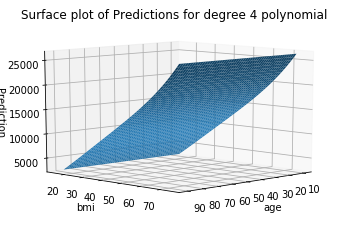

No of iterations: 50
Training error: [0.53176514]
No of iterations: 100
Training error: [0.49131159]
No of iterations: 150
Training error: [0.47264968]
No of iterations: 200
Training error: [0.4630468]
No of iterations: 250
Training error: [0.4575425]
No of iterations: 300
Training error: [0.45409944]
No of iterations: 350
Training error: [0.45181316]
No of iterations: 400
Training error: [0.45023886]
No of iterations: 450
Training error: [0.44913217]
No of iterations: 500
Training error: [0.44834514]
No of iterations: 550
Training error: [0.44778168]
No of iterations: 600
Training error: [0.44737652]
No of iterations: 650
Training error: [0.4470842]
No of iterations: 700
Training error: [0.44687258]
No of iterations: 750
Training error: [0.44671878]
No of iterations: 800
Training error: [0.44660646]
No of iterations: 850
Training error: [0.44652393]
No of iterations: 900
Training error: [0.44646279]
No of iterations: 950
Training error: [0.44641702]
No of iterations: 1000
Training err

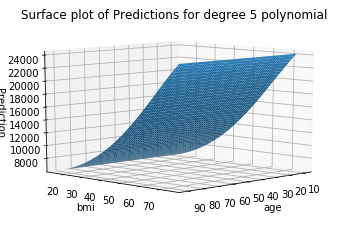

No of iterations: 50
Training error: [0.46324437]
No of iterations: 100
Training error: [0.45697545]
No of iterations: 150
Training error: [0.45342459]
No of iterations: 200
Training error: [0.451088]
No of iterations: 250
Training error: [0.4495247]
No of iterations: 300
Training error: [0.4484653]
No of iterations: 350
Training error: [0.44773952]
No of iterations: 400
Training error: [0.44723722]
No of iterations: 450
Training error: [0.44688596]
No of iterations: 500
Training error: [0.44663755]
No of iterations: 550
Training error: [0.44645961]
No of iterations: 600
Training error: [0.44633024]
No of iterations: 650
Training error: [0.44623451]
No of iterations: 700
Training error: [0.44616221]
No of iterations: 750
Training error: [0.44610633]
No of iterations: 800
Training error: [0.446062]
No of iterations: 850
Training error: [0.44602587]
No of iterations: 900
Training error: [0.4459956]
No of iterations: 950
Training error: [0.44596955]
No of iterations: 1000
Training error: 

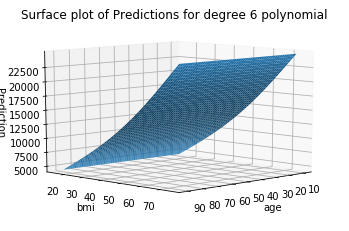

No of iterations: 50
Training error: [0.60597252]
No of iterations: 100
Training error: [0.52128737]
No of iterations: 150
Training error: [0.48476116]
No of iterations: 200
Training error: [0.46796876]
No of iterations: 250
Training error: [0.45968997]
No of iterations: 300
Training error: [0.45531993]
No of iterations: 350
Training error: [0.45287081]
No of iterations: 400
Training error: [0.45142956]
No of iterations: 450
Training error: [0.45054742]
No of iterations: 500
Training error: [0.44998901]
No of iterations: 550
Training error: [0.44962381]
No of iterations: 600
Training error: [0.44937638]
No of iterations: 650
Training error: [0.44920172]
No of iterations: 700
Training error: [0.44907253]
No of iterations: 750
Training error: [0.44897196]
No of iterations: 800
Training error: [0.44888958]
No of iterations: 850
Training error: [0.44881888]
No of iterations: 900
Training error: [0.44875578]
No of iterations: 950
Training error: [0.44869771]
No of iterations: 1000
Training 

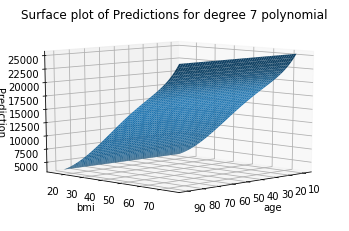

No of iterations: 50
Training error: [0.59586805]
No of iterations: 100
Training error: [0.50319112]
No of iterations: 150
Training error: [0.46885239]
No of iterations: 200
Training error: [0.4554908]
No of iterations: 250
Training error: [0.45004359]
No of iterations: 300
Training error: [0.44772537]
No of iterations: 350
Training error: [0.4466997]
No of iterations: 400
Training error: [0.44622951]
No of iterations: 450
Training error: [0.44600645]
No of iterations: 500
Training error: [0.44589665]
No of iterations: 550
Training error: [0.44584004]
No of iterations: 600
Training error: [0.44580896]
No of iterations: 650
Training error: [0.44579034]
No of iterations: 700
Training error: [0.4457779]
No of iterations: 750
Training error: [0.44576859]
No of iterations: 800
Training error: [0.44576088]
No of iterations: 850
Training error: [0.44575401]
No of iterations: 900
Training error: [0.4457476]
No of iterations: 950
Training error: [0.44574146]
No of iterations: 1000
Training erro

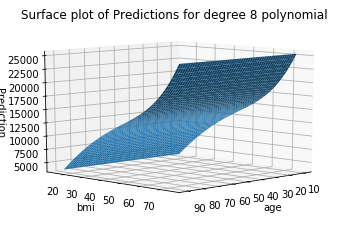

No of iterations: 50
Training error: [0.55980867]
No of iterations: 100
Training error: [0.47262162]
No of iterations: 150
Training error: [0.45591524]
No of iterations: 200
Training error: [0.45211275]
No of iterations: 250
Training error: [0.45096848]
No of iterations: 300
Training error: [0.4504779]
No of iterations: 350
Training error: [0.45018498]
No of iterations: 400
Training error: [0.44996501]
No of iterations: 450
Training error: [0.44977759]
No of iterations: 500
Training error: [0.44960787]
No of iterations: 550
Training error: [0.44944973]
No of iterations: 600
Training error: [0.44930038]
No of iterations: 650
Training error: [0.44915834]
No of iterations: 700
Training error: [0.4490227]
No of iterations: 750
Training error: [0.44889281]
No of iterations: 800
Training error: [0.44876817]
No of iterations: 850
Training error: [0.44864837]
No of iterations: 900
Training error: [0.44853305]
No of iterations: 950
Training error: [0.44842193]
No of iterations: 1000
Training er

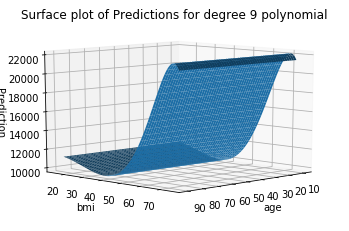

No of iterations: 50
Training error: [0.53913068]
No of iterations: 100
Training error: [0.47100164]
No of iterations: 150
Training error: [0.45674857]
No of iterations: 200
Training error: [0.45230948]
No of iterations: 250
Training error: [0.45055042]
No of iterations: 300
Training error: [0.44969706]
No of iterations: 350
Training error: [0.44918807]
No of iterations: 400
Training error: [0.44882658]
No of iterations: 450
Training error: [0.44853857]
No of iterations: 500
Training error: [0.44829369]
No of iterations: 550
Training error: [0.44807787]
No of iterations: 600
Training error: [0.44788358]
No of iterations: 650
Training error: [0.44770618]
No of iterations: 700
Training error: [0.44754251]
No of iterations: 750
Training error: [0.44739029]
No of iterations: 800
Training error: [0.44724778]
No of iterations: 850
Training error: [0.44711368]
No of iterations: 900
Training error: [0.44698694]
No of iterations: 950
Training error: [0.44686674]
No of iterations: 1000
Training 

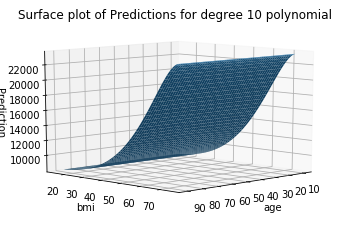

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('insurance.txt', sep=",",header=None)
df.columns = ['age','bmi','children','charges']
df.insert(0,'Nothing',1)
df = df.drop(columns=['children'])

#print(df.head())
global learnRate
learnRate = 0.01
flag = 0

def CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x @ w
    error = (y_pred - y)**2
    cost = ((1/(2*n)) * sum(error))
    grad = 1/n * (x.transpose() @ (y_pred - y))[0:]
    return cost, grad

def gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it+=1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs or ((it>2) and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)   
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)

for deg in range(1,11):
    age_ax = np.linspace(10,90,1000)
    bmi_ax = np.linspace(15,75,1000)
    all_features = []
    degree = deg
    for x in range(len(age_ax)):
            features = []
            for i in range (1,degree+1):
                for j in range(i+1):
                    features.append(age_ax[x]**j * bmi_ax[x]**(i-j))

            all_features.append(np.array(features))

    norm_all_features = (all_features - np.mean(all_features,axis=0))/np.std(all_features,axis=0)
    norm_all_features = np.insert(norm_all_features, 0, values=1, axis=1) # Insert values before column 0
    y_start = df.iloc[:,3]
    x_start = np.array(df.drop(columns=['charges']))
    data_temp = transform_dataset(df,deg)
    df_new = norms(data_temp)
    df_new['Const'] = df_new['Const'].fillna(1)
    train, validate, test = np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.7*len(df_new)), int(.9*len(df_new))])
    y_train = train.iloc[:,3]
    x_train = np.array(train.drop(columns=['y']))
    y_test = test.iloc[:,3]
    x_test = np.array(test.drop(columns=['y']))
    y_validate = validate.iloc[:,3]
    x_validate = np.array(validate.drop(columns=['y']))
    initial_w = np.random.rand(x_train.shape[1],1)
    train_err,w,Error_history = gradientDescent(initial_w,x_train,y_train,1000)
    predictions = norm_all_features @ w
    x = np.array(age_ax)
    y = np.array(bmi_ax)
    X,Y = np.meshgrid(x,y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(10,45)
    mycmap = plt.get_cmap('gist_earth')
    predictions = predictions*y_start.std() + y_start.mean()
    predictions = np.array(predictions)
    ax.plot_surface(X,Y,predictions)
    ax.set_title(f"Surface plot of Predictions for degree {i} polynomial")
    ax.set_xlabel('age')
    ax.set_ylabel('bmi')
    ax.set_zlabel('Prediction')
    plt.show()
    cur_error = testaccuracy(w,y_test,x_test)